In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rubin_sim.maf as maf

In [2]:
families = maf.archive.get_family_descriptions('runs_v2.2.json')
family_list = families.index.values
summary_source = 'summary_2022_10_19.csv'
summaries = maf.get_metric_summaries(summary_source=summary_source)
metrics_source = 'metric_sets.json'
metric_sets = maf.get_metric_sets(metrics_source)

# list the metric sets
msets = list(metric_sets.groupby('metric set').first().index)
msets = [m for m in msets if 'DDF' not in m]

In [3]:
draft_run = 'draft_connected_v2.99_10yrs'

tt = pd.read_csv('/Users/lynnej/opsim/v2.9/summary.csv', index_col=0)
tt = tt.join(pd.read_csv('/Users/lynnej/opsim/v2.9/meta_summary.csv', index_col=0))
tt_disc = pd.read_csv('ss_tmp/discovery_v2.9.csv', index_col=0)
tt_char = pd.read_csv('ss_tmp/characterization_v2.9.csv', index_col=0)
tt = tt.join(tt_disc).join(tt_char)

In [4]:
# Set SN metric names back to previous versions
swaps = [m for m in tt if "DDF excluded" in m and 'NSN' in m]
newswaps = [m.replace(' DDF excluded', ' ') for m in swaps]
mapper = dict(zip(swaps, newswaps))
tt.rename(mapper, axis=1, inplace=True)
tt[newswaps]

swaps = [m for m in tt if ", only DDF observations" in m and "NSN" in m]
newswaps = [m.replace(', only DDF observations', '') for m in swaps]
mapper = dict(zip(swaps, newswaps))
tt.rename(mapper, axis=1, inplace=True)

In [5]:
summaries = pd.concat([summaries, tt], join='inner')
summaries

fOArea fO  HealpixSlicer  \
baseline_retrofoot_v2.0_10yrs                17510.183320   
baseline_v2.0_10yrs                          12893.228978   
baseline_v2.1_10yrs                          12434.135354   
baseline_v2.2_10yrs                          10569.224874   
bluer_indx0_v2.0_10yrs                       12849.585708   
...                                                   ...   
vary_nes_nesfrac0.55_v2.0_10yrs               4007.627156   
vary_nes_nesfrac0.75_v2.0_10yrs               2155.306081   
vary_nes_nesfrac1.00_v2.0_10yrs               5678.660803   
virgo_cluster_v2.0_10yrs                     12161.364919   
draft_connected_v2.99_10yrs                   1953.036312   

                                 fOArea/benchmark fO  HealpixSlicer  \
baseline_retrofoot_v2.0_10yrs                              0.972788   
baseline_v2.0_10yrs                                        0.716290   
baseline_v2.1_10yrs                                        0.690785   
baseline_v2.2_10yrs                                        0.587179   
bluer_indx0_v2.0_10yrs                                     0.713866   
...                                                             ...   
vary_nes_nesfrac0.55_v2.0_10yrs                            0.222646   
vary_nes_nesfrac0.75_v2.0_10yrs                            0.119739   
vary_nes_nesfrac1.00_v2.0_10yrs                            0.315481   
virgo_cluster_v2.0_10yrs                                   0.675631   
draft_connected_v2.99_10yrs                                0.108502   

                                 fONv MedianNvis fO  HealpixSlicer  \
baseline_retrofoot_v2.0_10yrs                                875.0   
baseline_v2.0_10yrs                                          839.0   
baseline_v2.1_10yrs                                          838.0   
baseline_v2.2_10yrs                                          830.0   
bluer_indx0_v2.0_10yrs                                       839.0   
...                                                            ...   
vary_nes_nesfrac0.55_v2.0_10yrs                              804.0   
vary_nes_nesfrac0.75_v2.0_10yrs                              777.0   
vary_nes_nesfrac1.00_v2.0_10yrs                              727.0   
virgo_cluster_v2.0_10yrs                                     836.0   
draft_connected_v2.99_10yrs                                  792.0   

                                 fONv MinNvis fO  HealpixSlicer  \
baseline_retrofoot_v2.0_10yrs                             806.0   
baseline_v2.0_10yrs                                       787.0   
baseline_v2.1_10yrs                                       784.0   
baseline_v2.2_10yrs                                       779.0   
bluer_indx0_v2.0_10yrs                                    788.0   
...                                                         ...   
vary_nes_nesfrac0.55_v2.0_10yrs                           753.0   
vary_nes_nesfrac0.75_v2.0_10yrs                           722.0   
vary_nes_nesfrac1.00_v2.0_10yrs                           683.0   
virgo_cluster_v2.0_10yrs                                  787.0   
draft_connected_v2.99_10yrs                               748.0   

                                 fONv/benchmark MedianNvis fO  HealpixSlicer  \
baseline_retrofoot_v2.0_10yrs                                       1.060606   
baseline_v2.0_10yrs                                                 1.016970   
baseline_v2.1_10yrs                                                 1.015758   
baseline_v2.2_10yrs                                                 1.006061   
bluer_indx0_v2.0_10yrs                                              1.016970   
...                                                                      ...   
vary_nes_nesfrac0.55_v2.0_10yrs                                     0.974545   
vary_nes_nesfrac0.75_v2.0_10yrs                                     0.941818   
vary_nes_nesfrac1.00_v2.0_10yrs                                     0.881212   
v

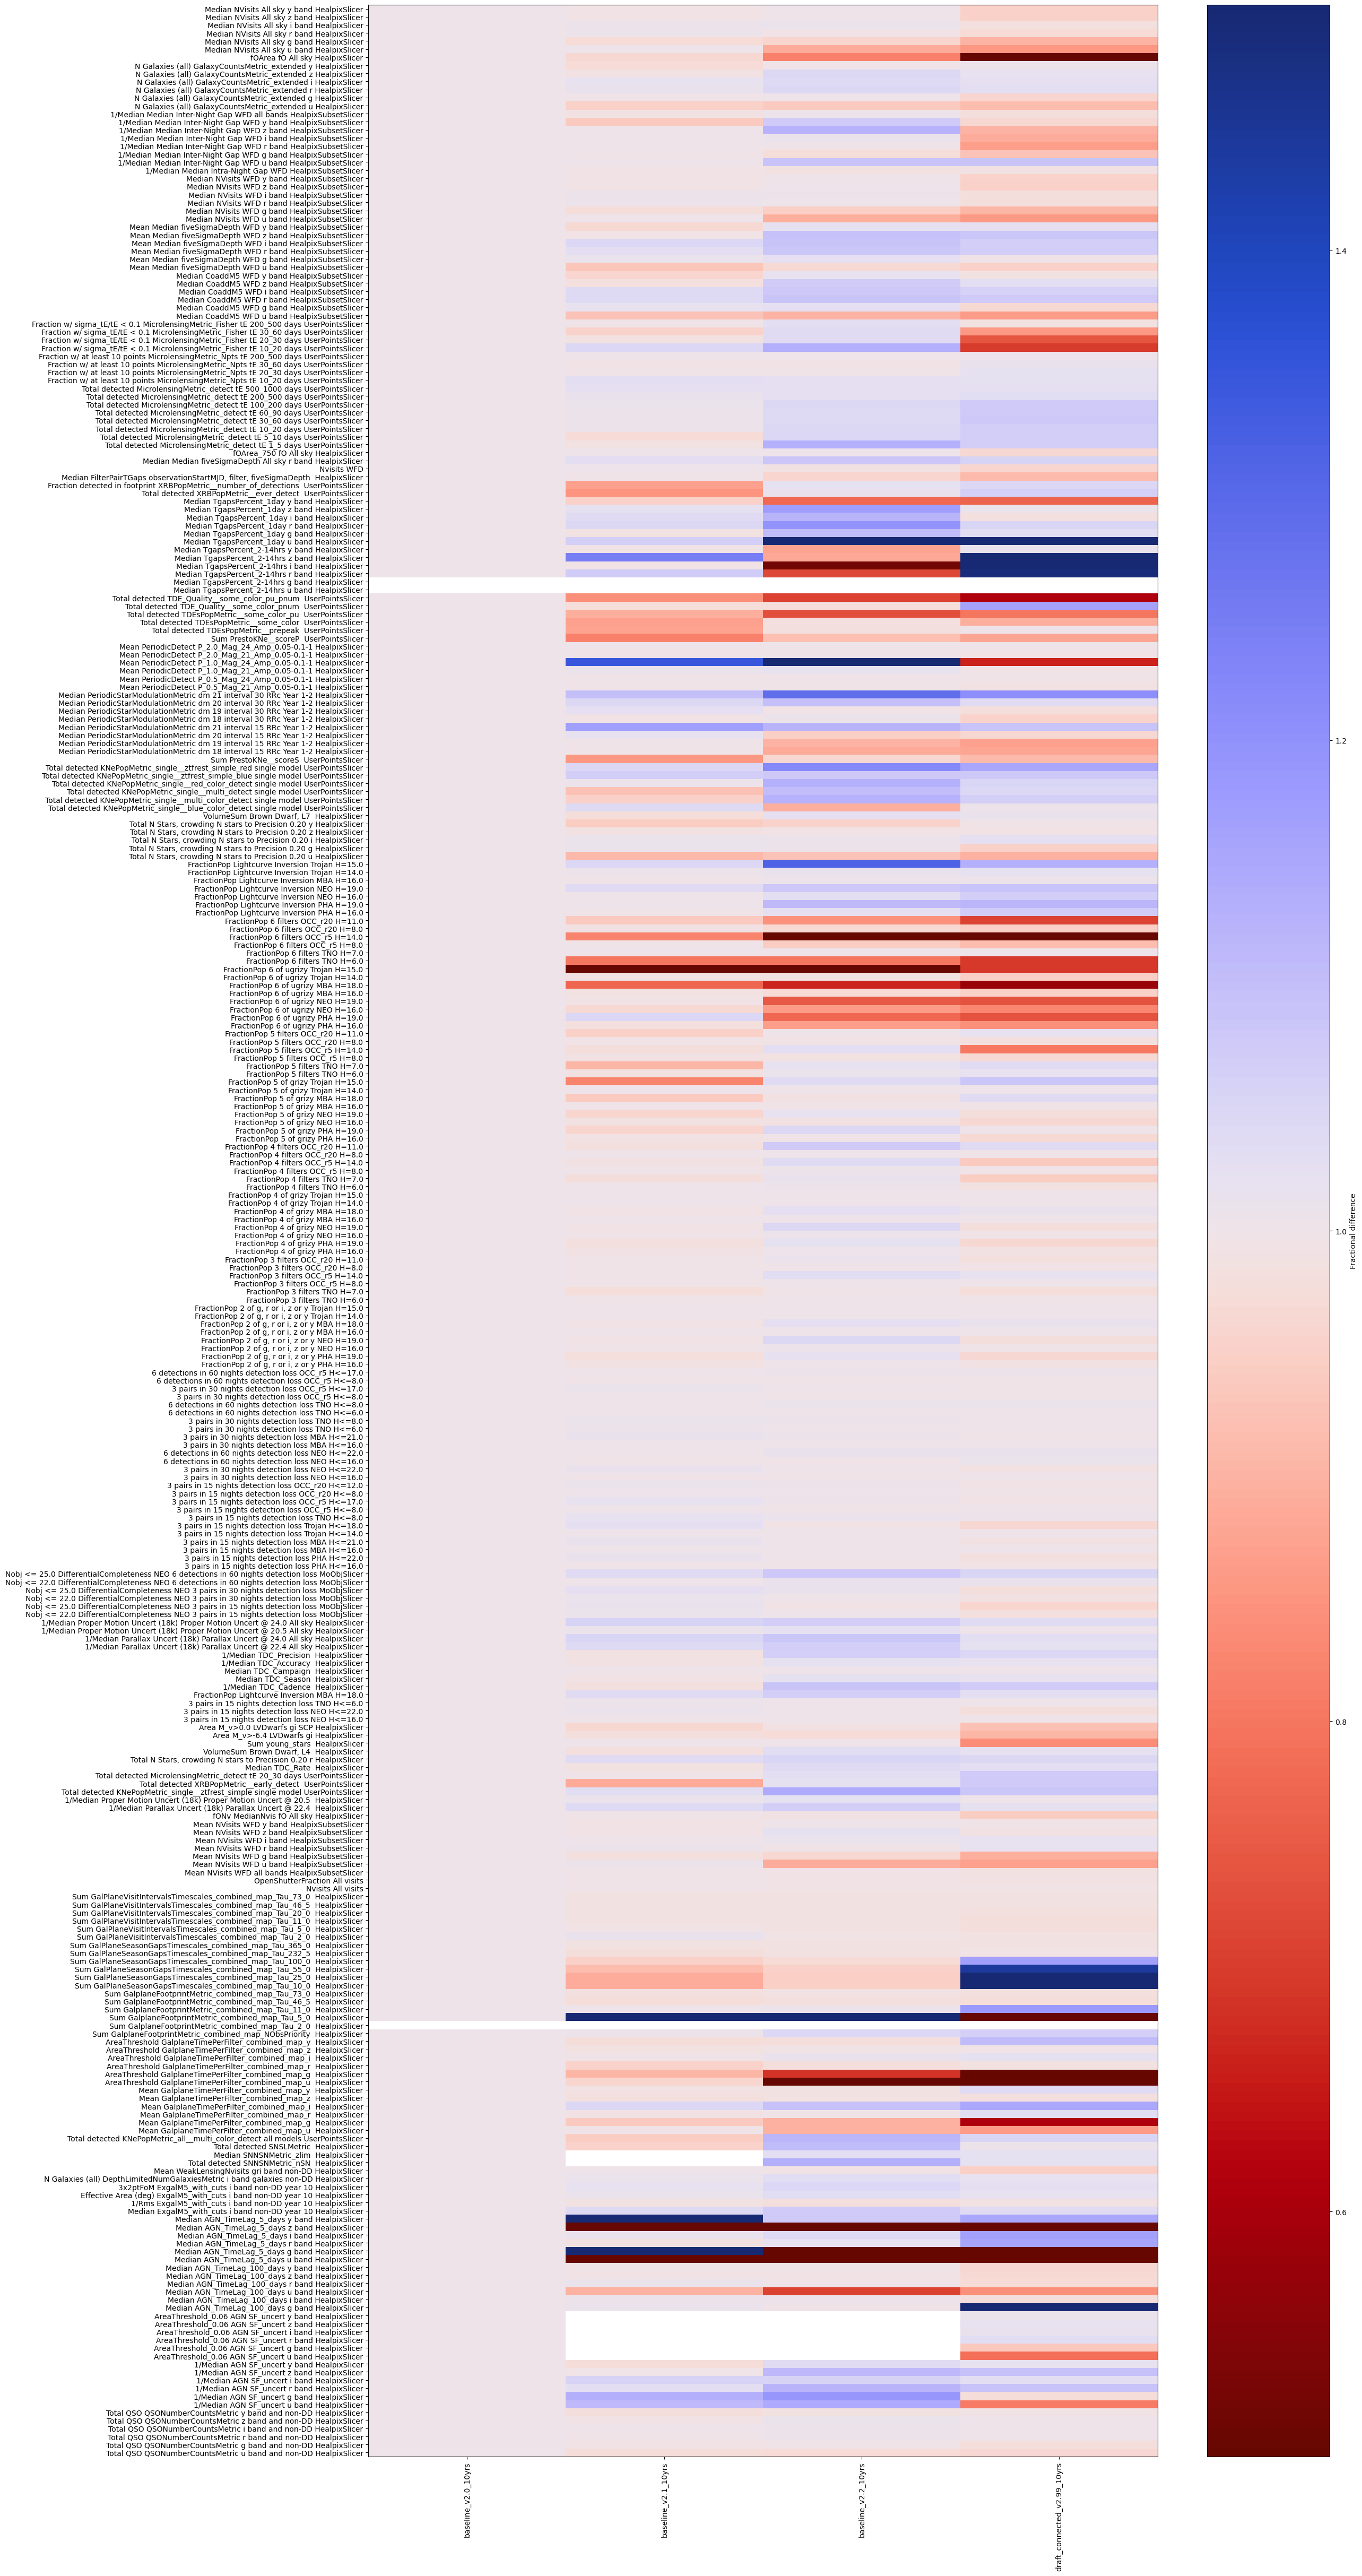

In [6]:
baseline_run = 'baseline_v2.0_10yrs'

these_runs = ['baseline_v2.0_10yrs', 'baseline_v2.1_10yrs', 'baseline_v2.2_10yrs', draft_run]

# We can plot them all together, but need to remove duplicates
non_dd = [m for m in msets if 'DD' not in m]
msub = metric_sets.loc[non_dd].reset_index(drop=True).drop('style', axis=1).drop('short_name', axis=1)
msub = msub.drop_duplicates().set_index('metric', drop=False, verify_integrity=True)

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=1)
fig.set_figwidth(24)
fig.set_figheight(60)

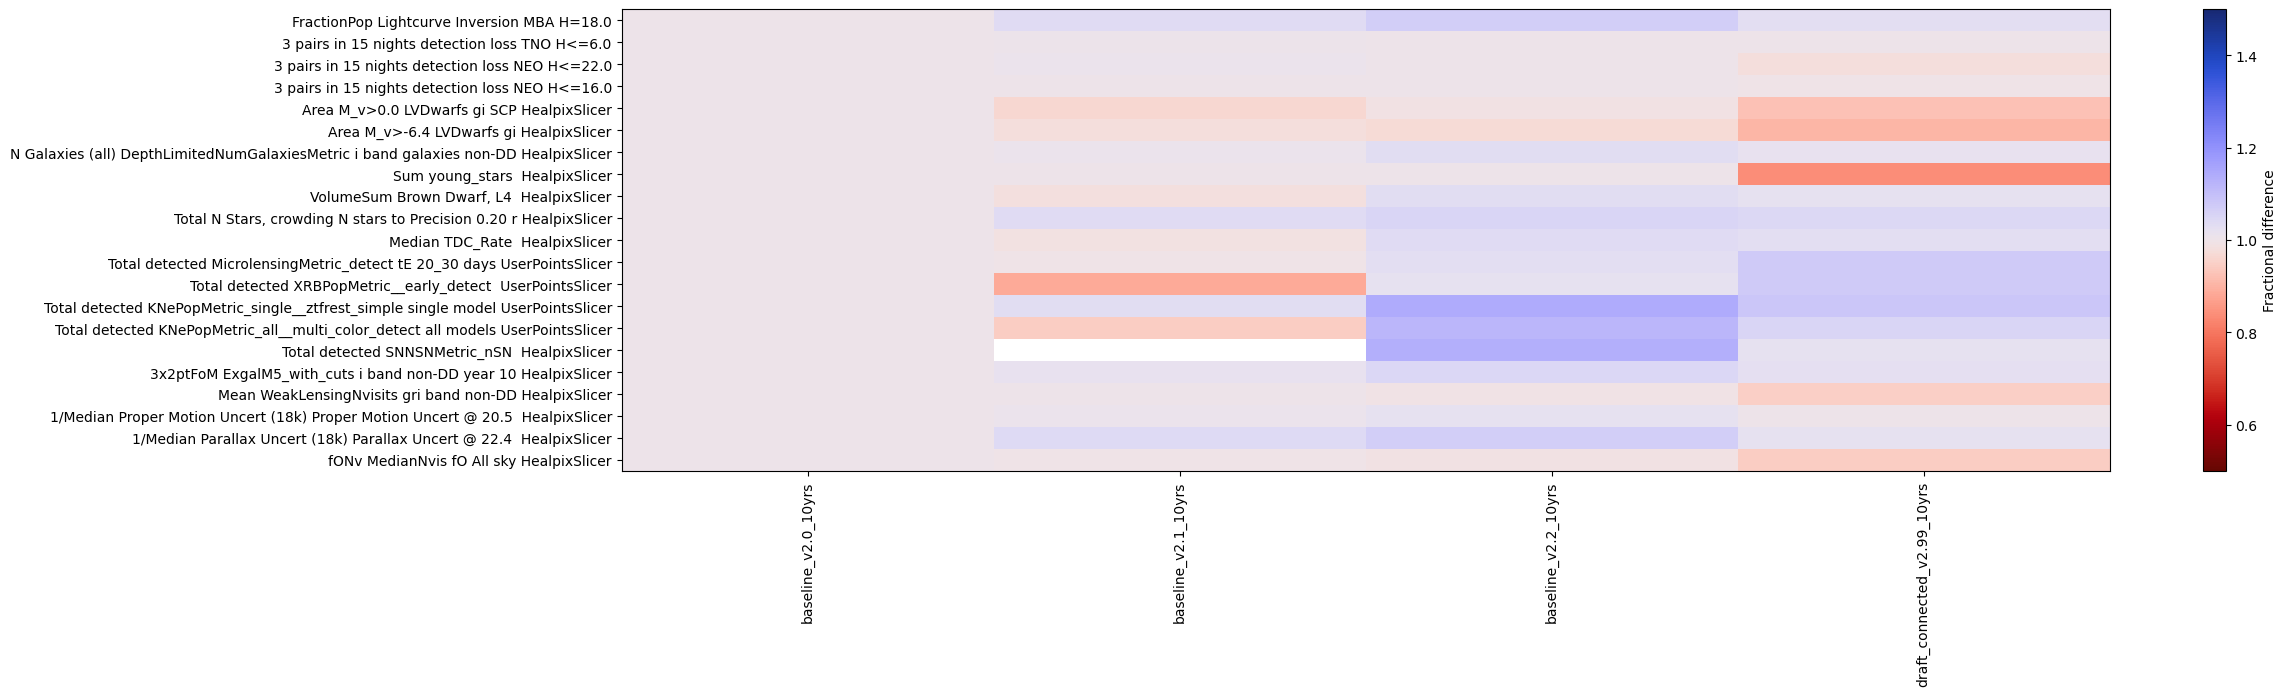

In [7]:
msub = metric_sets.loc['SCOC']
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=1)
fig.set_figwidth(24)

In [23]:
# Time in DDFs
pd.DataFrame(summaries.loc[these_runs, 'Nvisits DDF']/summaries.loc[these_runs, 'Nvisits All visits'],
            columns=['Fraction DDF'])

Fraction DDF
baseline_v2.0_10yrs              0.045169
baseline_v2.1_10yrs              0.045136
baseline_v2.2_10yrs              0.050087
draft_connected_v2.99_10yrs      0.072508

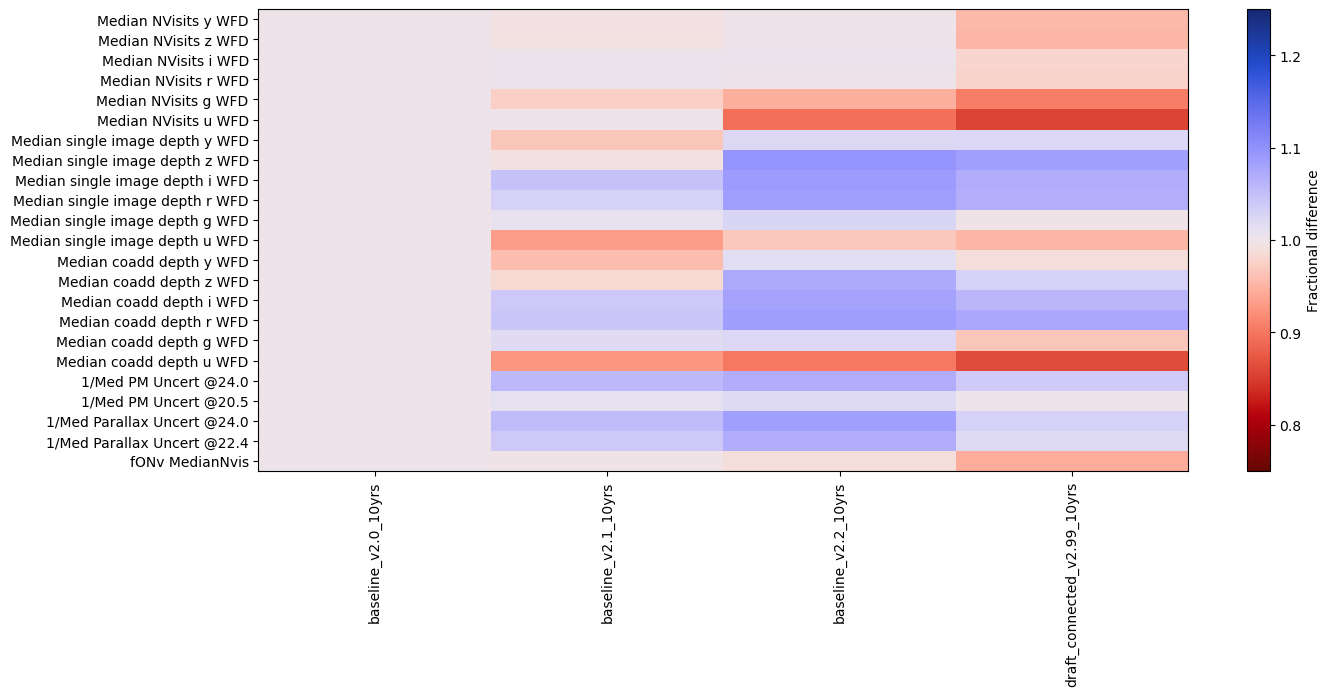

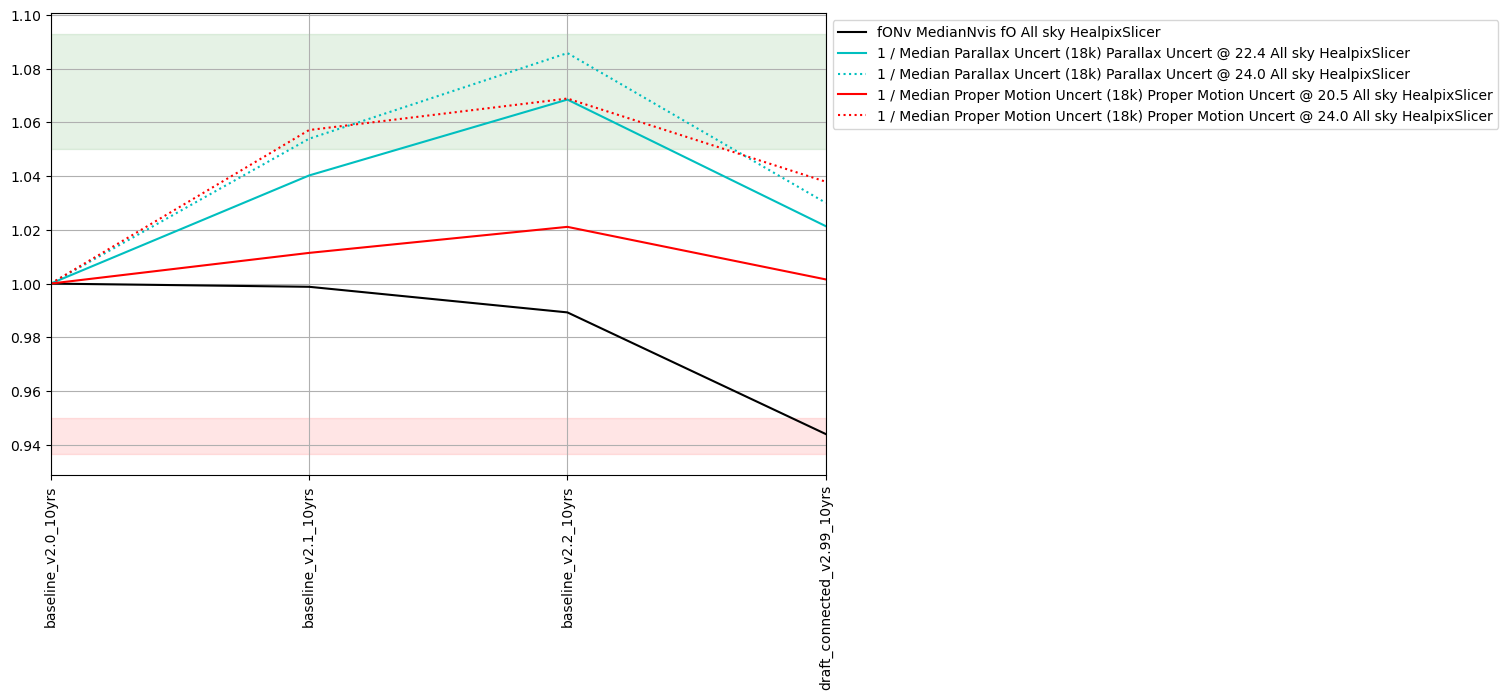

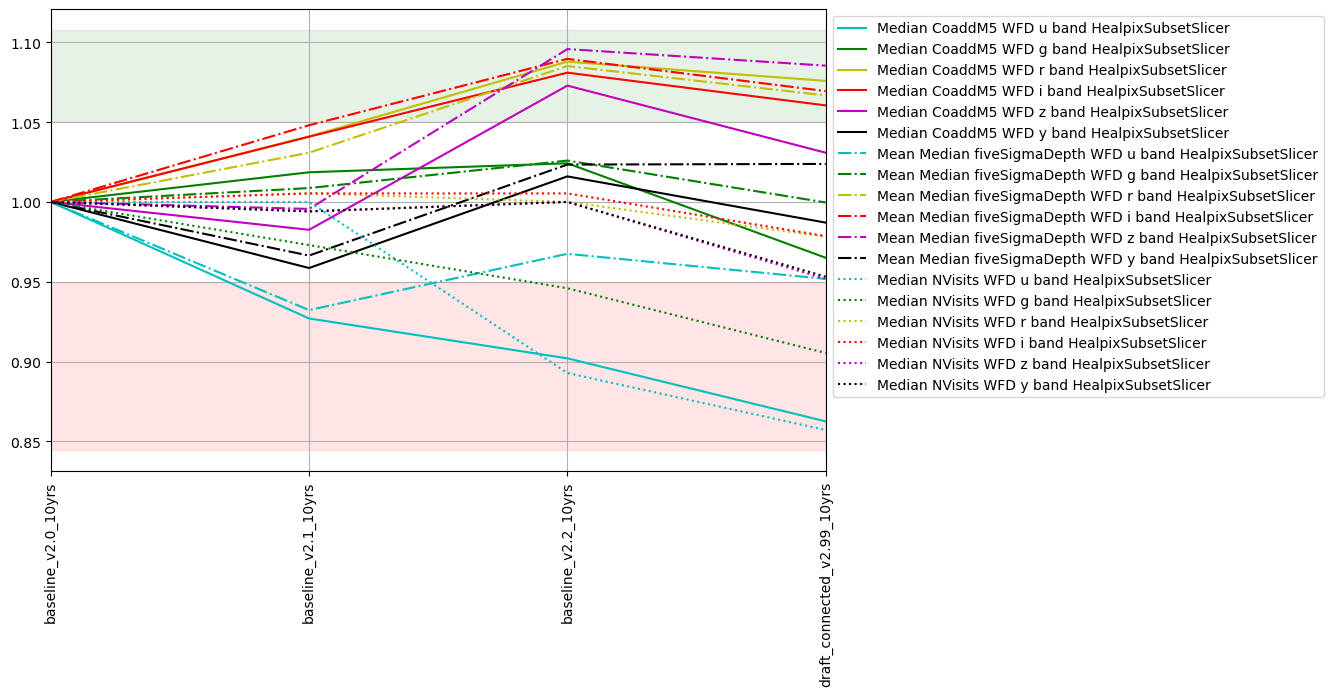

In [9]:
# Very basic metrics 

msub = metric_sets.loc[['SRD', 'WFD Depths']].reset_index('metric set')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)

msub = metric_sets.loc['SRD']
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                            horizontal_quantity='run', 
                             vertical_quantity='value')

msub = metric_sets.loc['WFD Depths']
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                            horizontal_quantity='run', 
                             vertical_quantity='value')

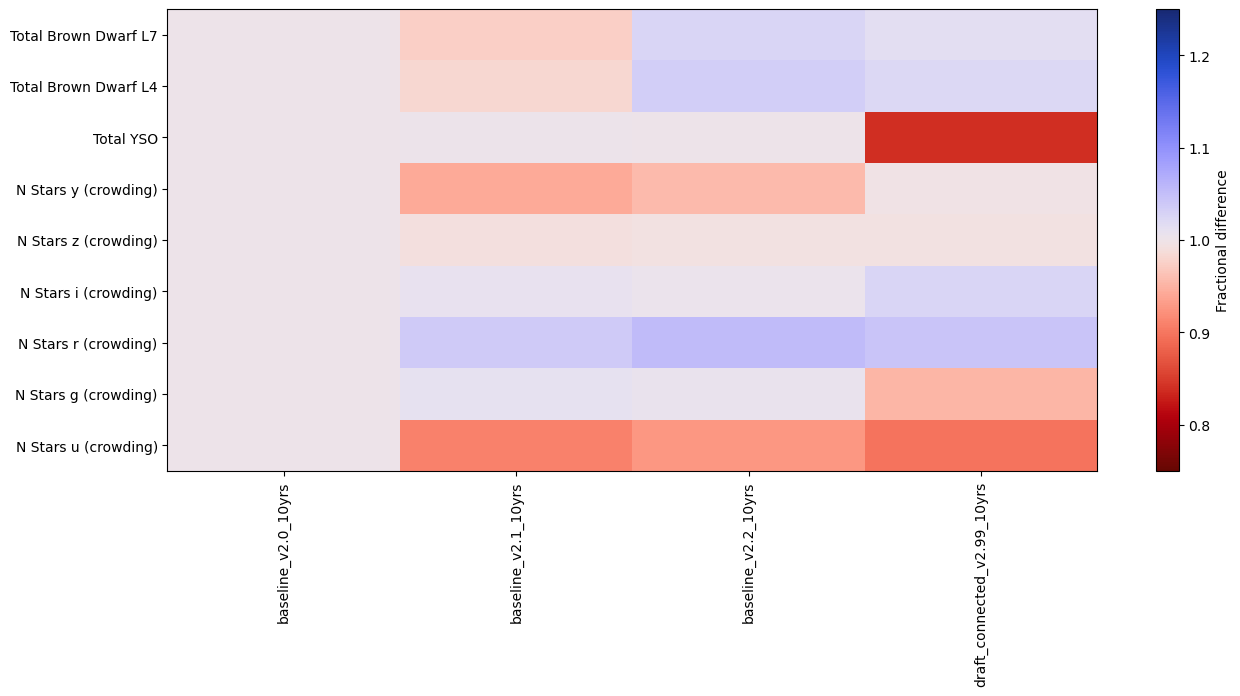

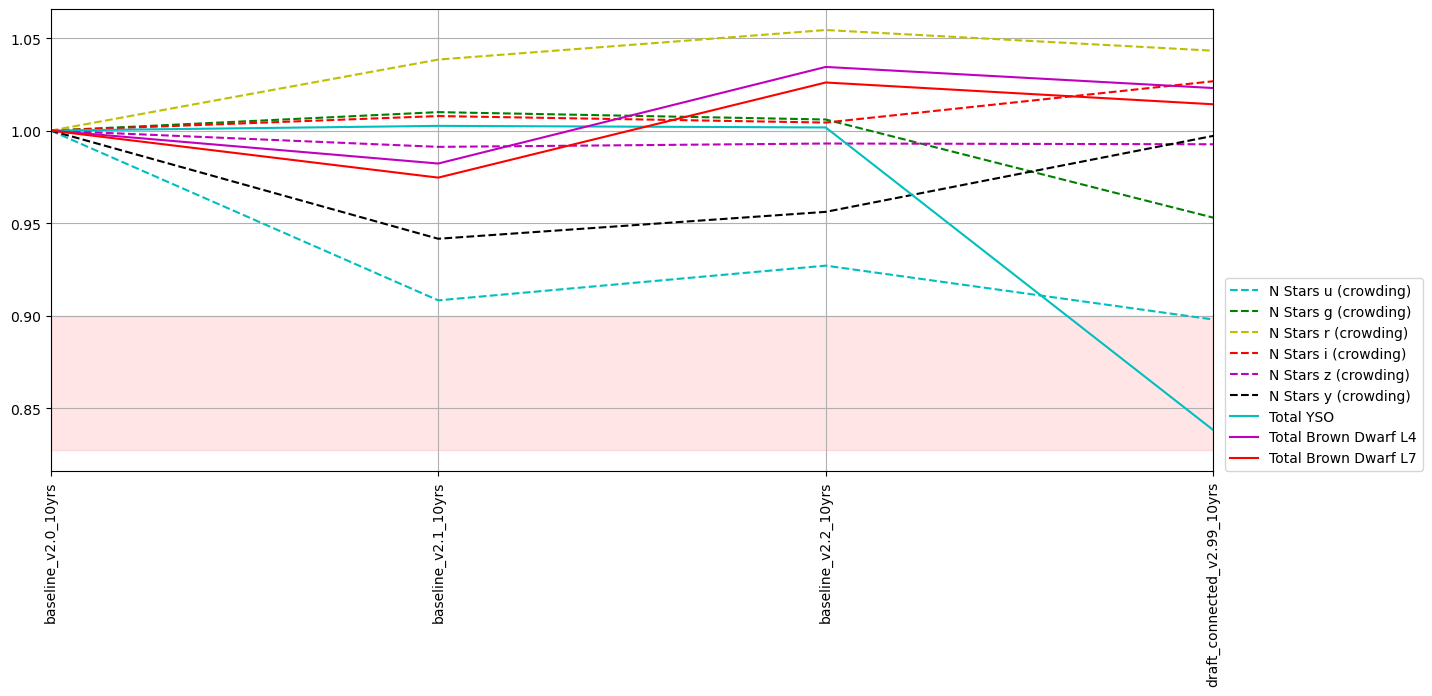

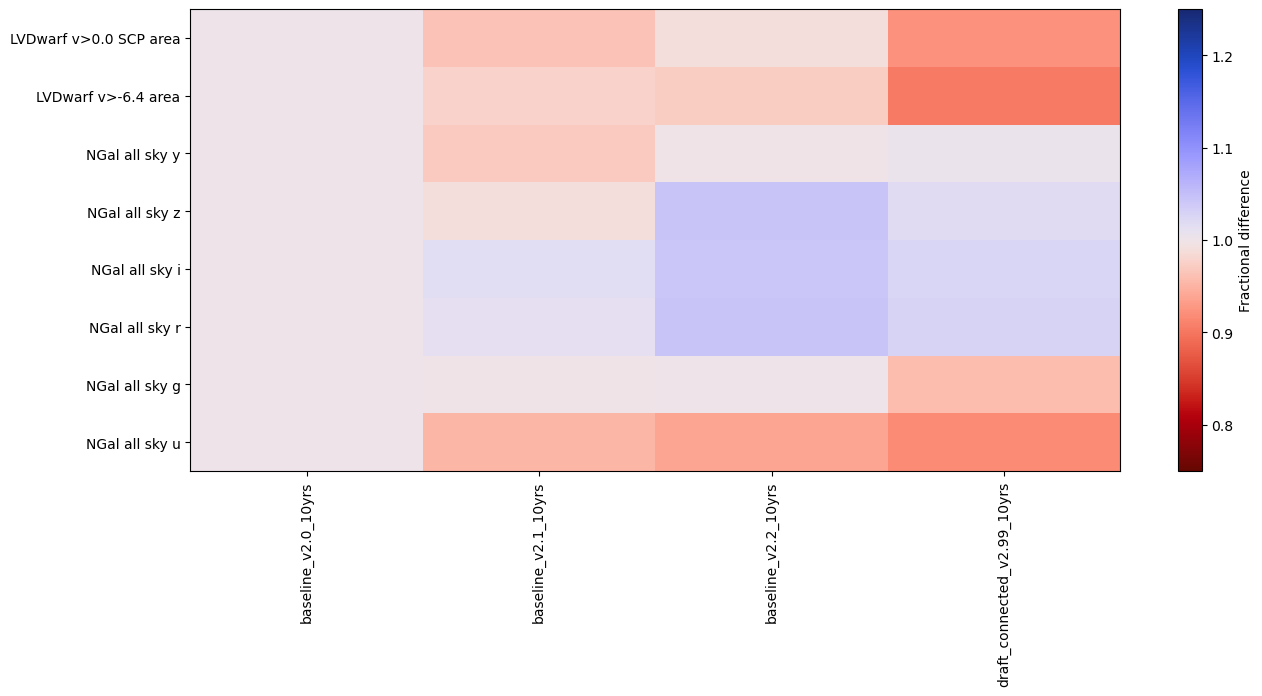

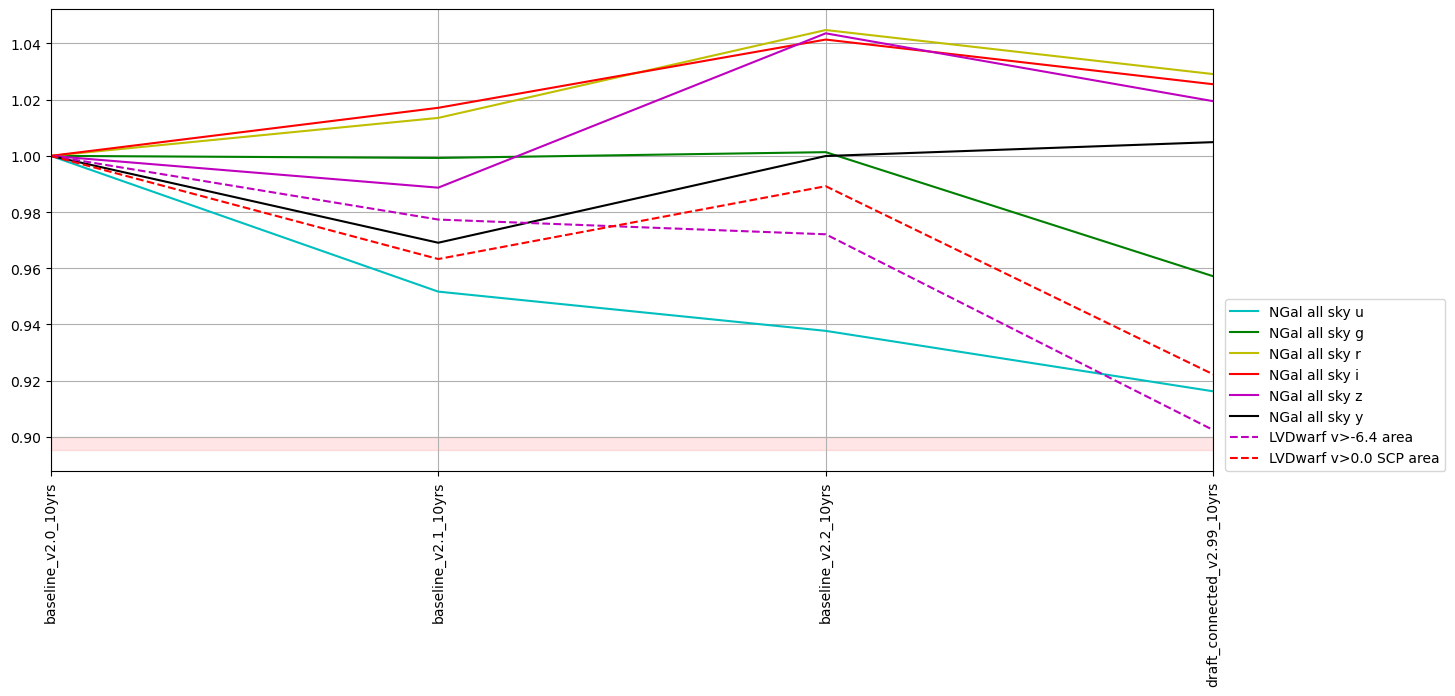

In [10]:
# Stars and Galaxy counts metrics
k_sets = ['Stars', 'galaxies']
for k in k_sets:
    msub = metric_sets.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)


    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_sets.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_sets.loc[k],
                                  metric_label_map=metric_sets.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value', 
                                 shade_fraction=0.1)
    fig.set_figwidth(15)
    ylim = list(ax.get_ylim())
    ax.set_ylim(max(0.2, ylim[0]), min(2, ylim[1]))
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

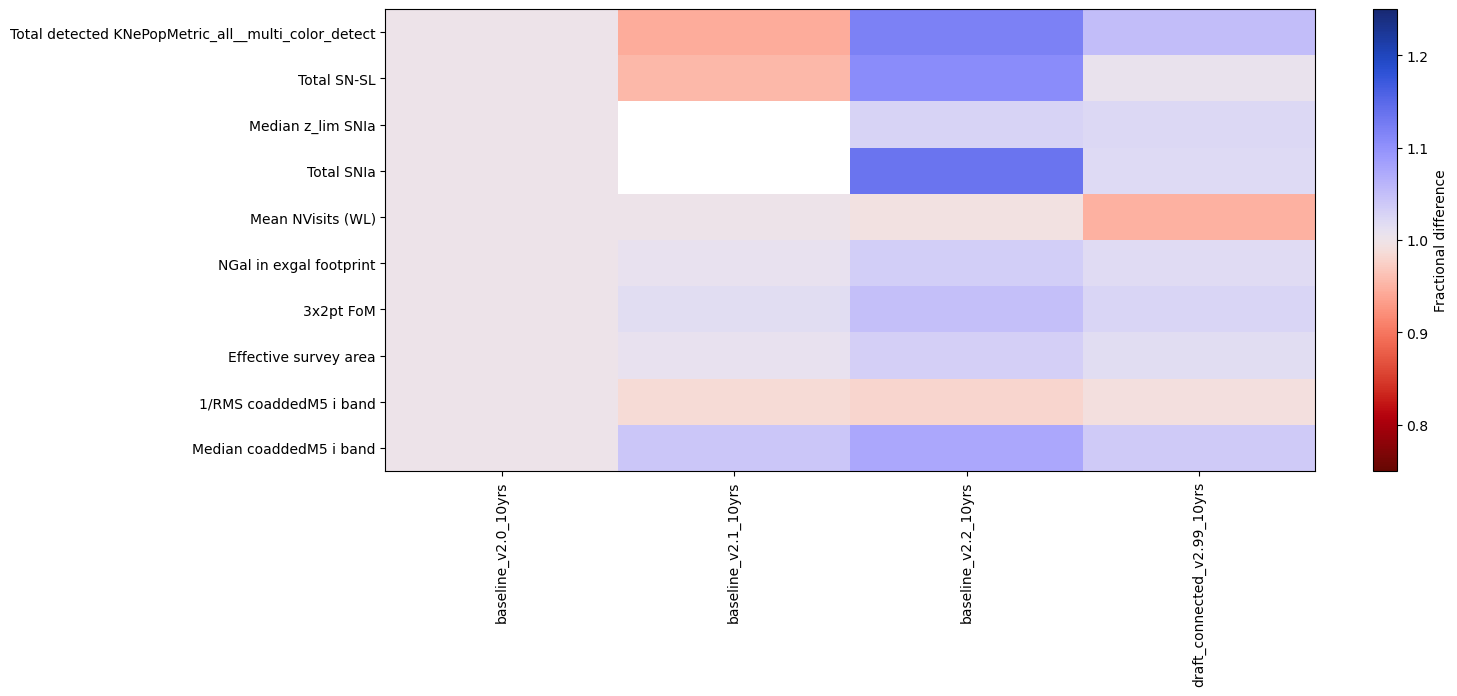

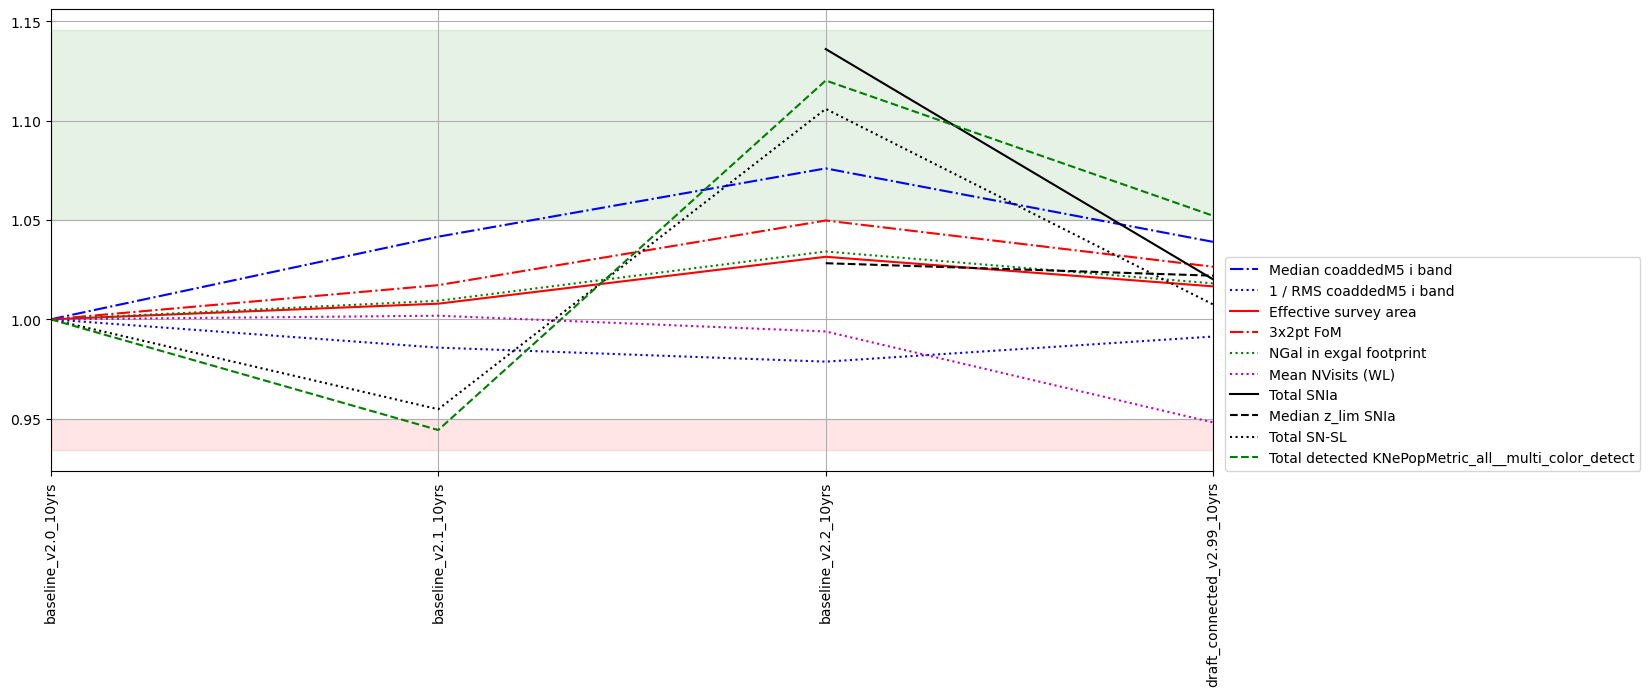

In [11]:
# DESC metrics
k_sets = [k for k in msets if k.startswith('DESC') and not k.endswith('DDF')]

for k in k_sets:
    msub = metric_sets.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)


    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_sets.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_sets.loc[k],
                                  metric_label_map=metric_sets.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')


SSO discovery
SSO lightcurve inversion


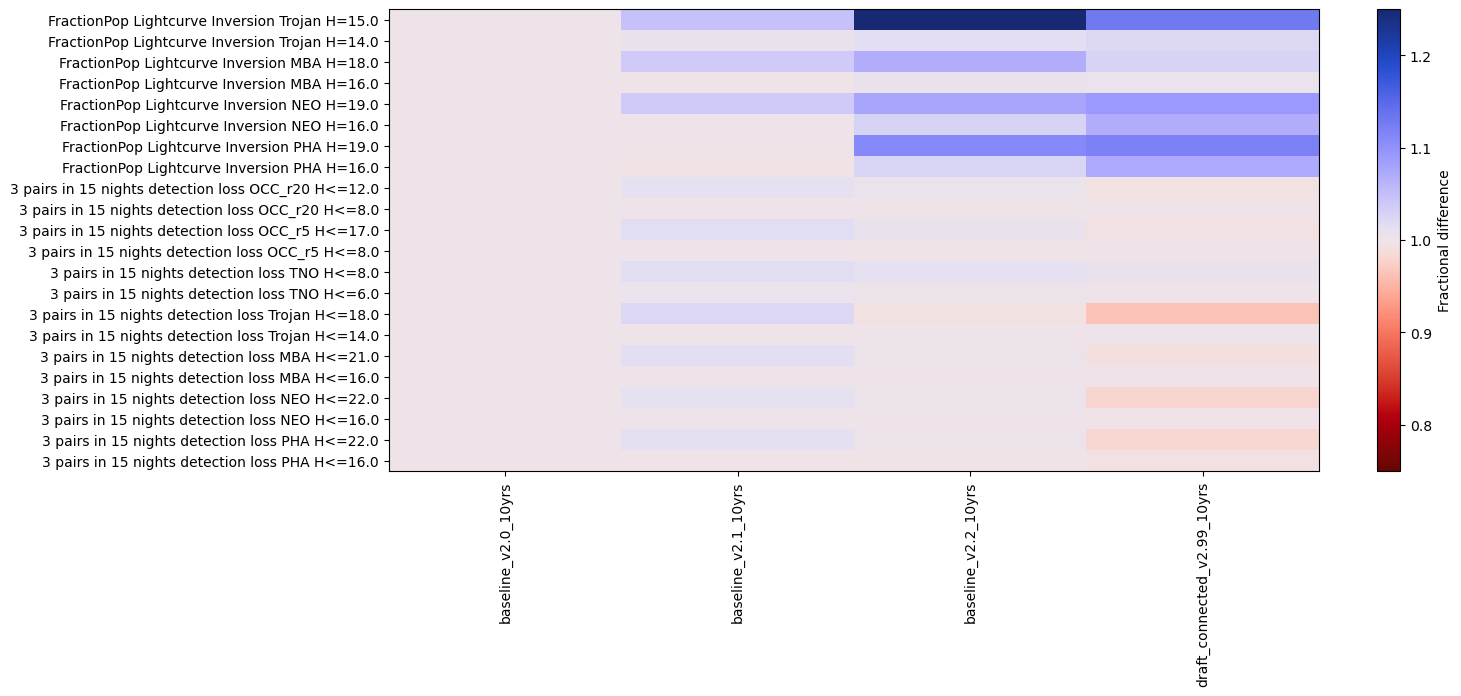

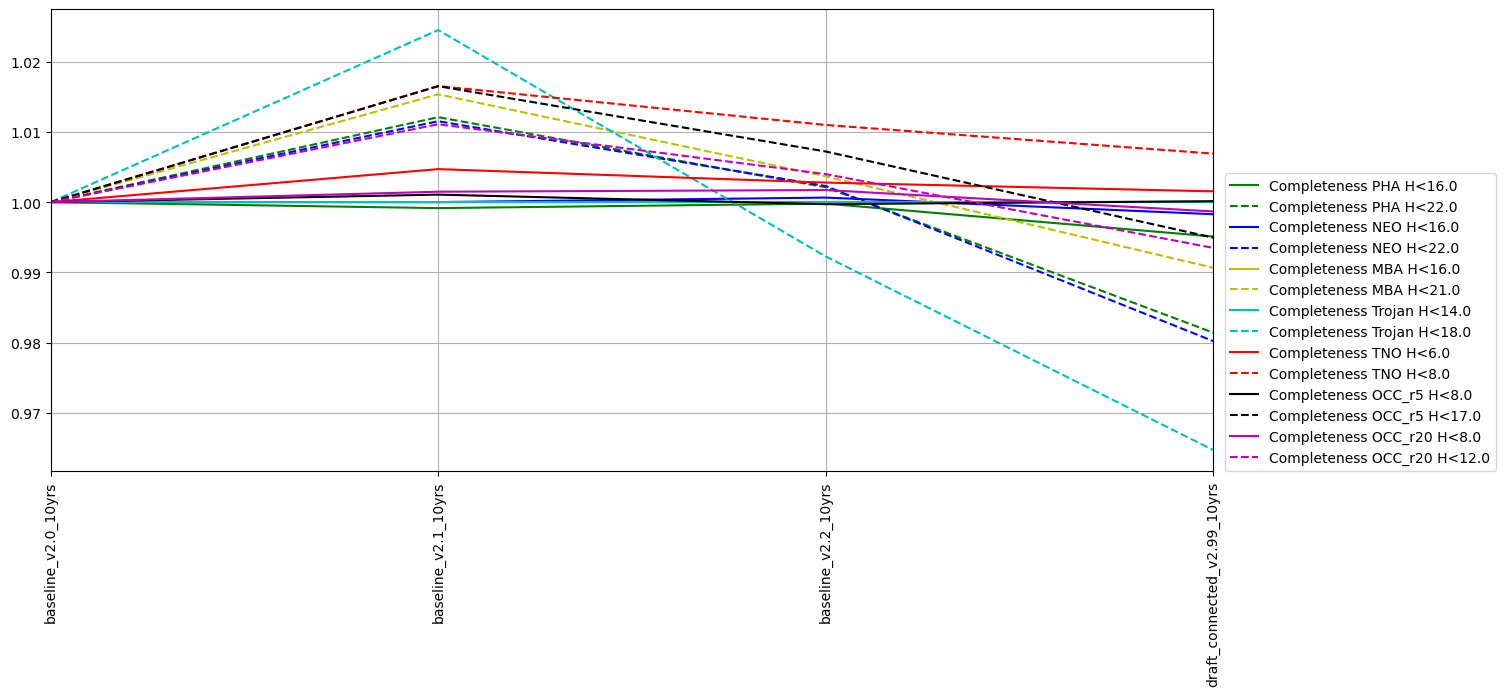

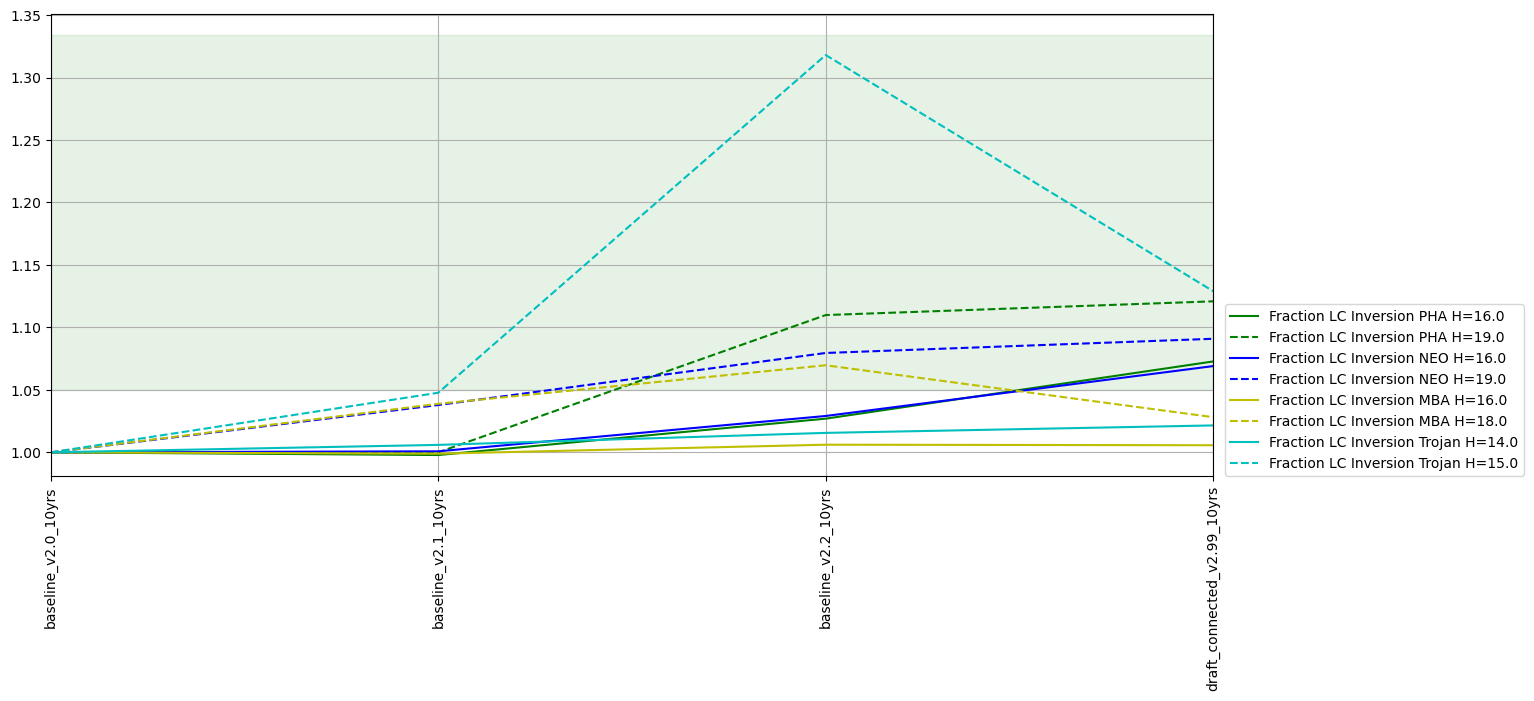

In [12]:
# sso metrics
k_sets = ['SSO discovery', 'SSO lightcurve inversion']

msub = metric_sets.loc[k_sets].reset_index('metric set')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)


for k in k_sets:
    print(k)
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_sets.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_sets.loc[k],
                                  metric_label_map=metric_sets.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')


/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/runComparison/summary_plots.py:326: UserWarning: There are infinite values in the plot of Median TgapsPercent_2-14hrs u band.
  warnings.warn(f"There are infinite values in the plot of {idx}.")


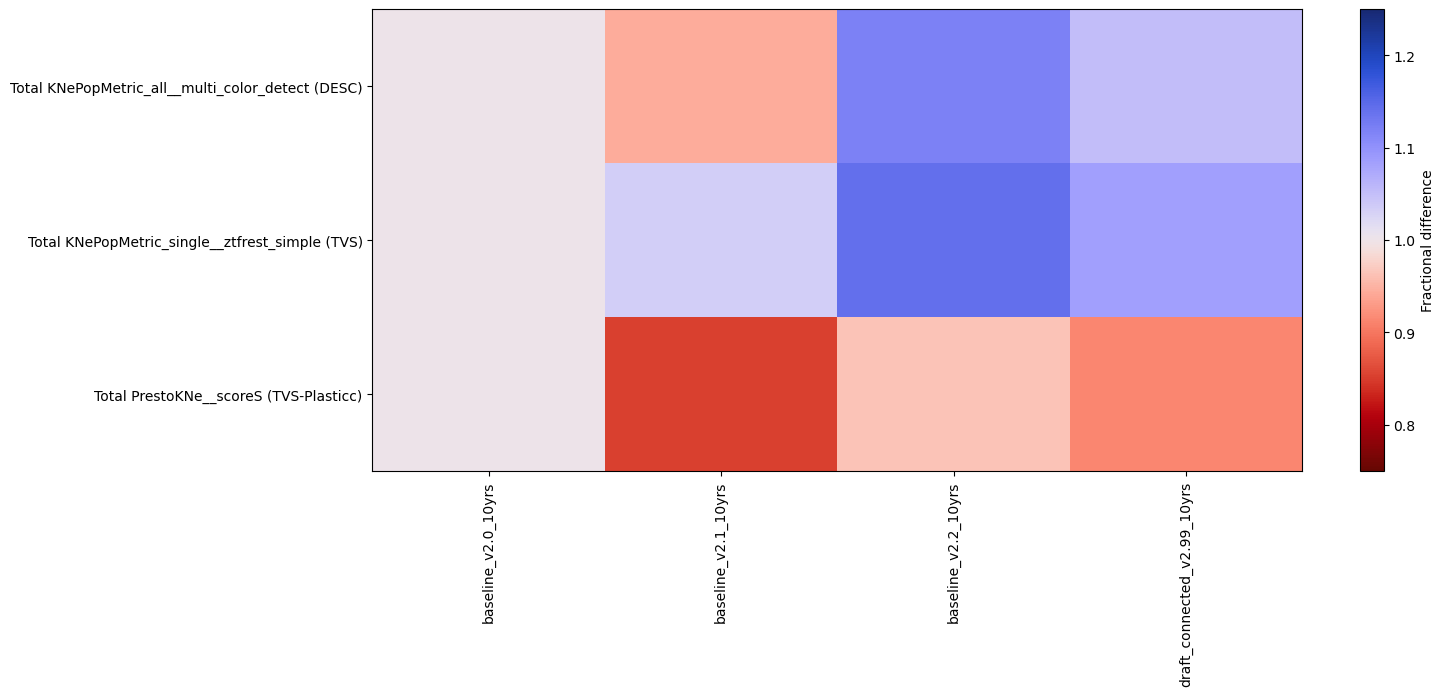

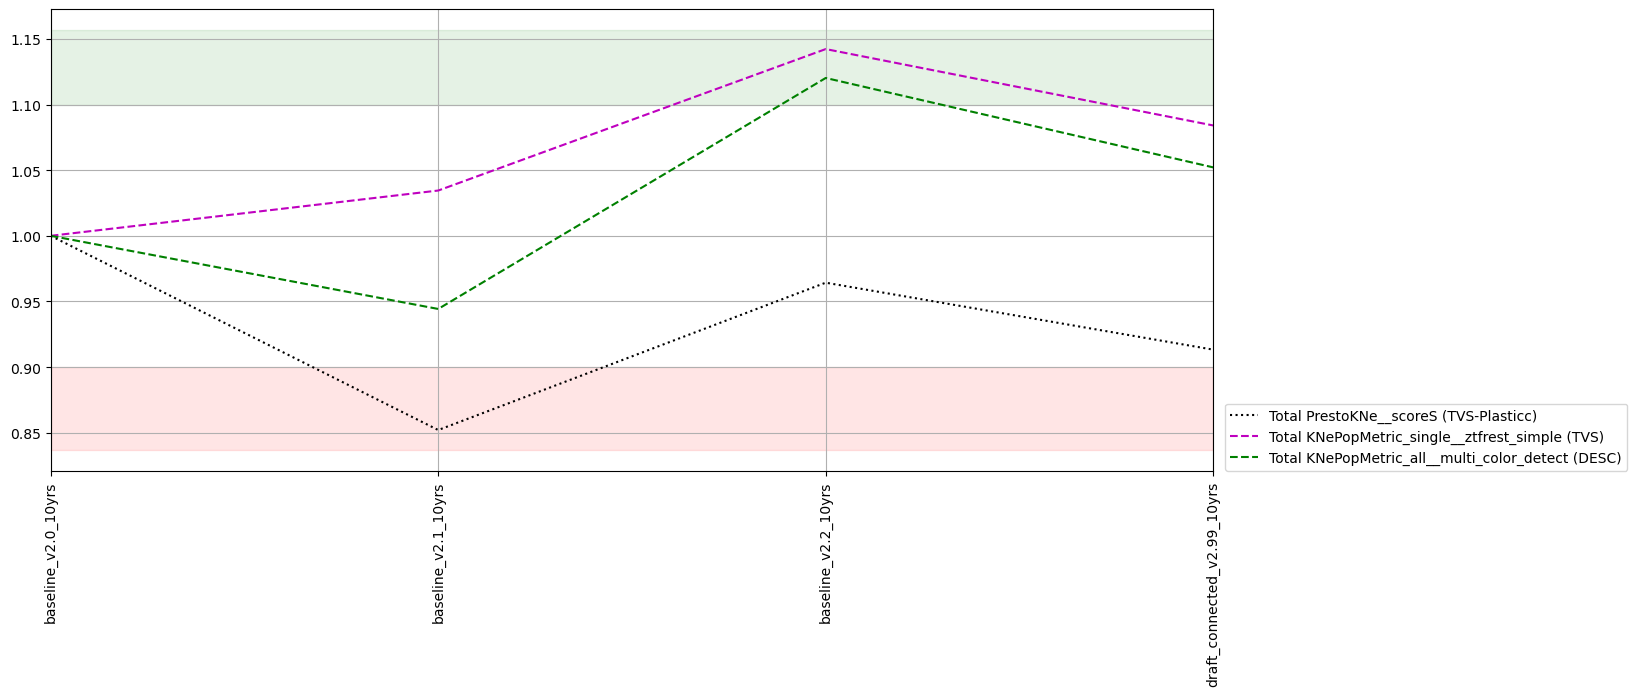

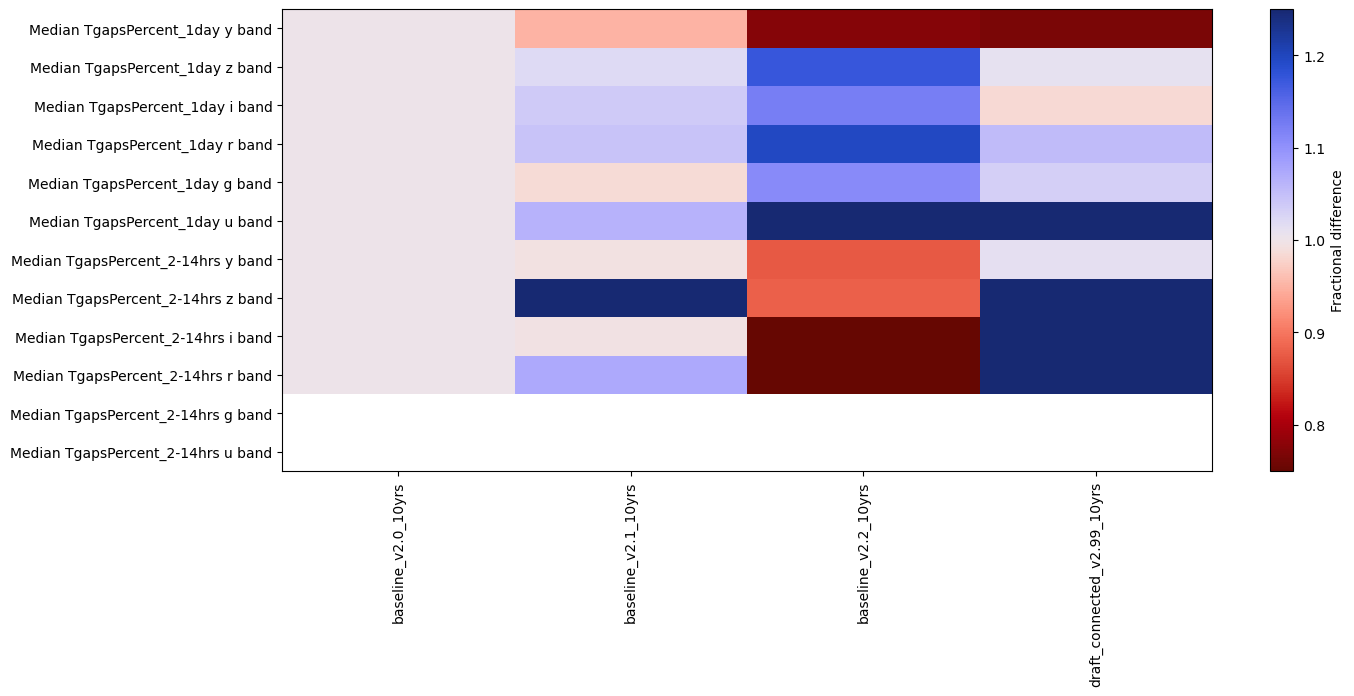

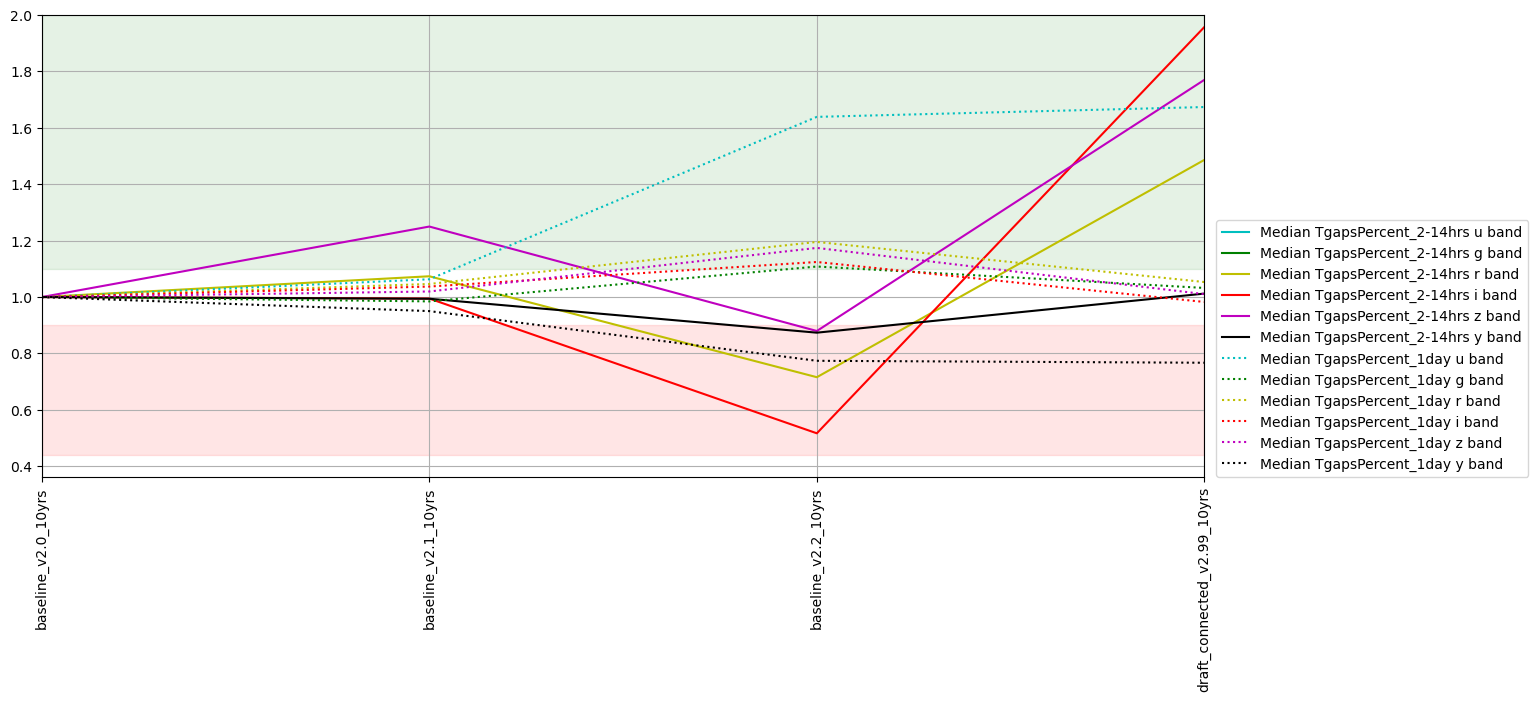

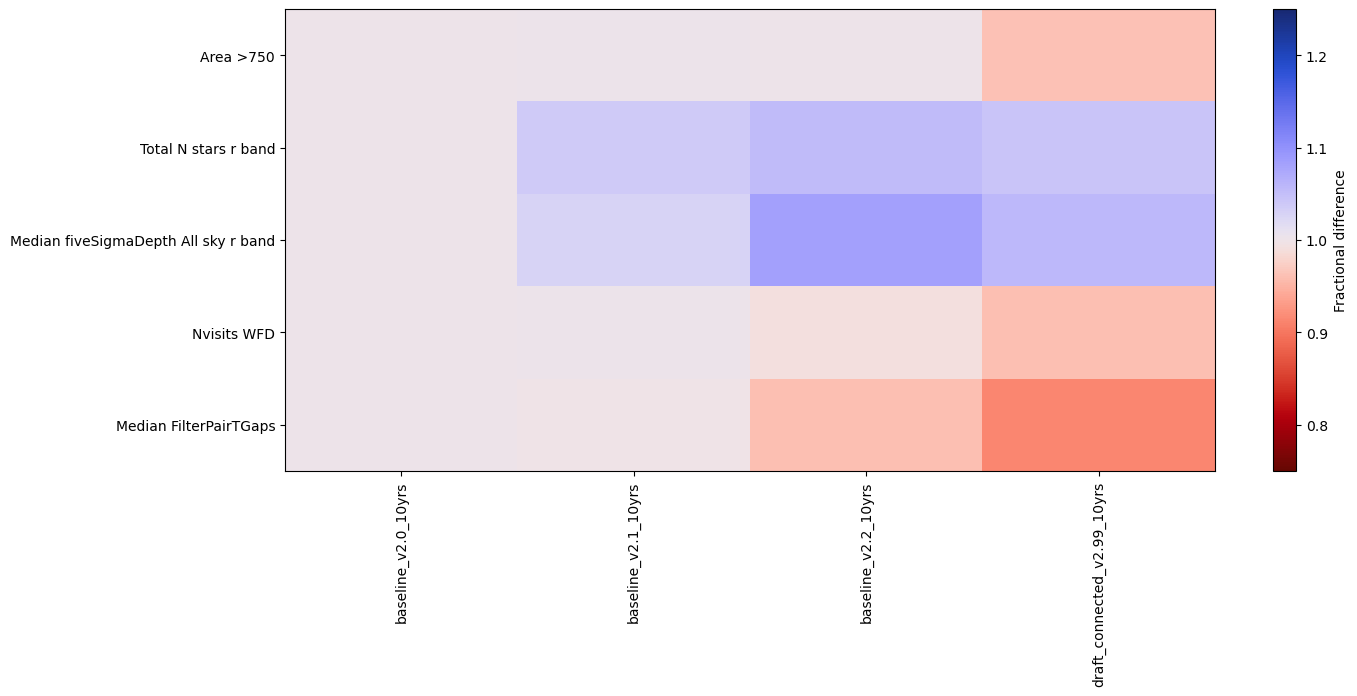

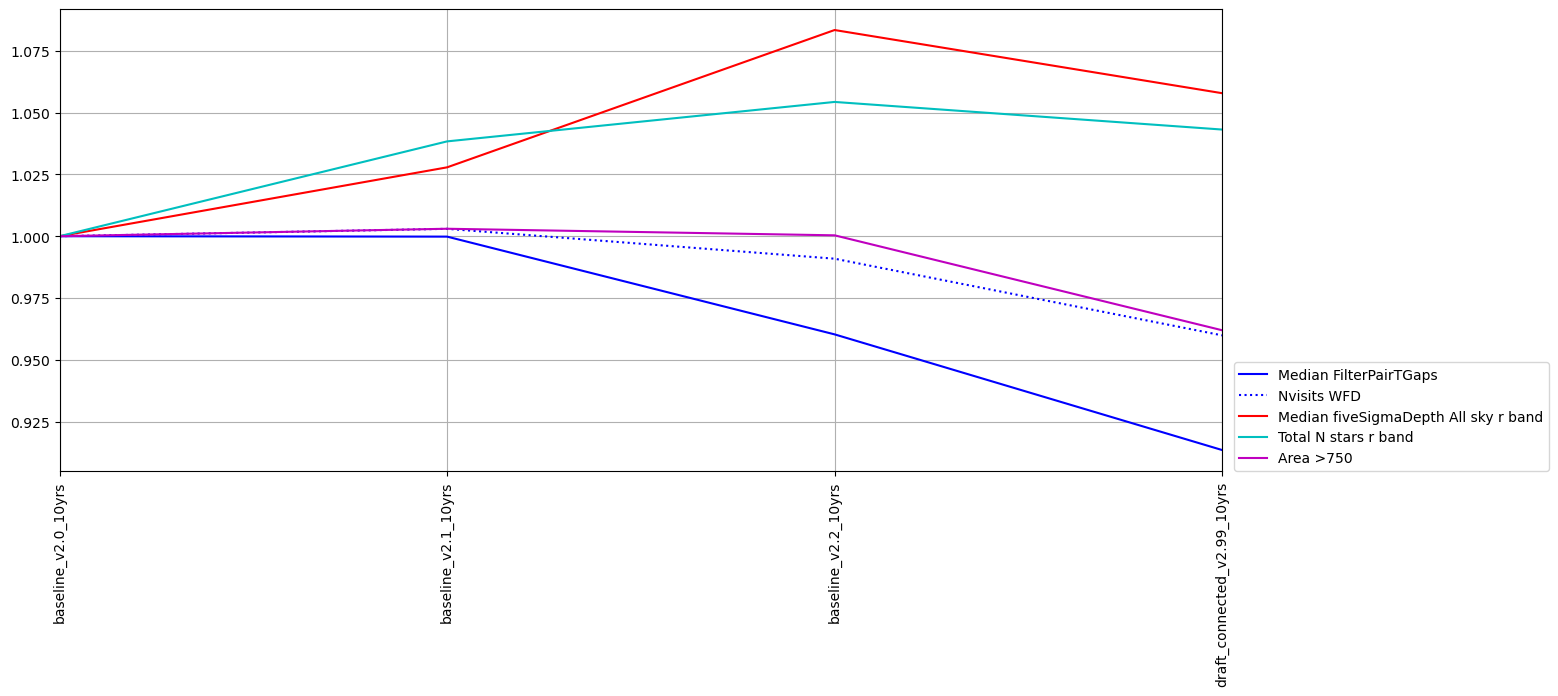

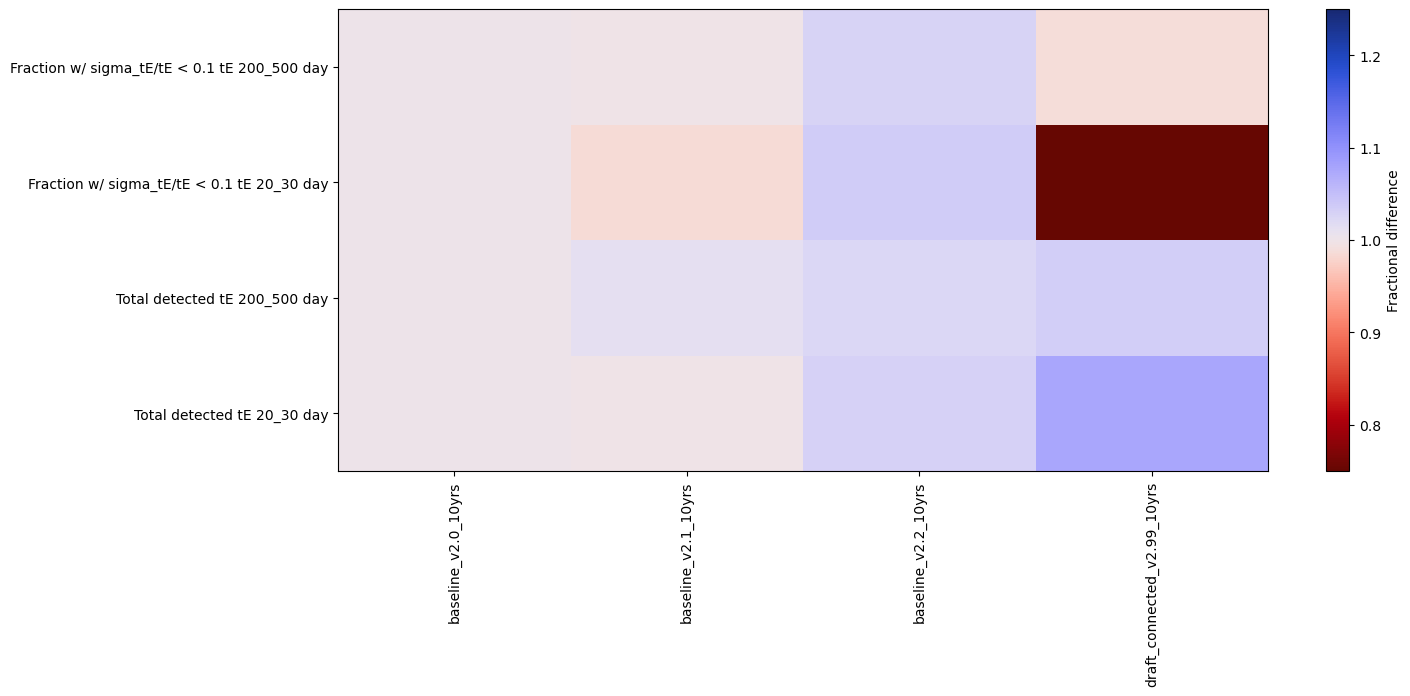

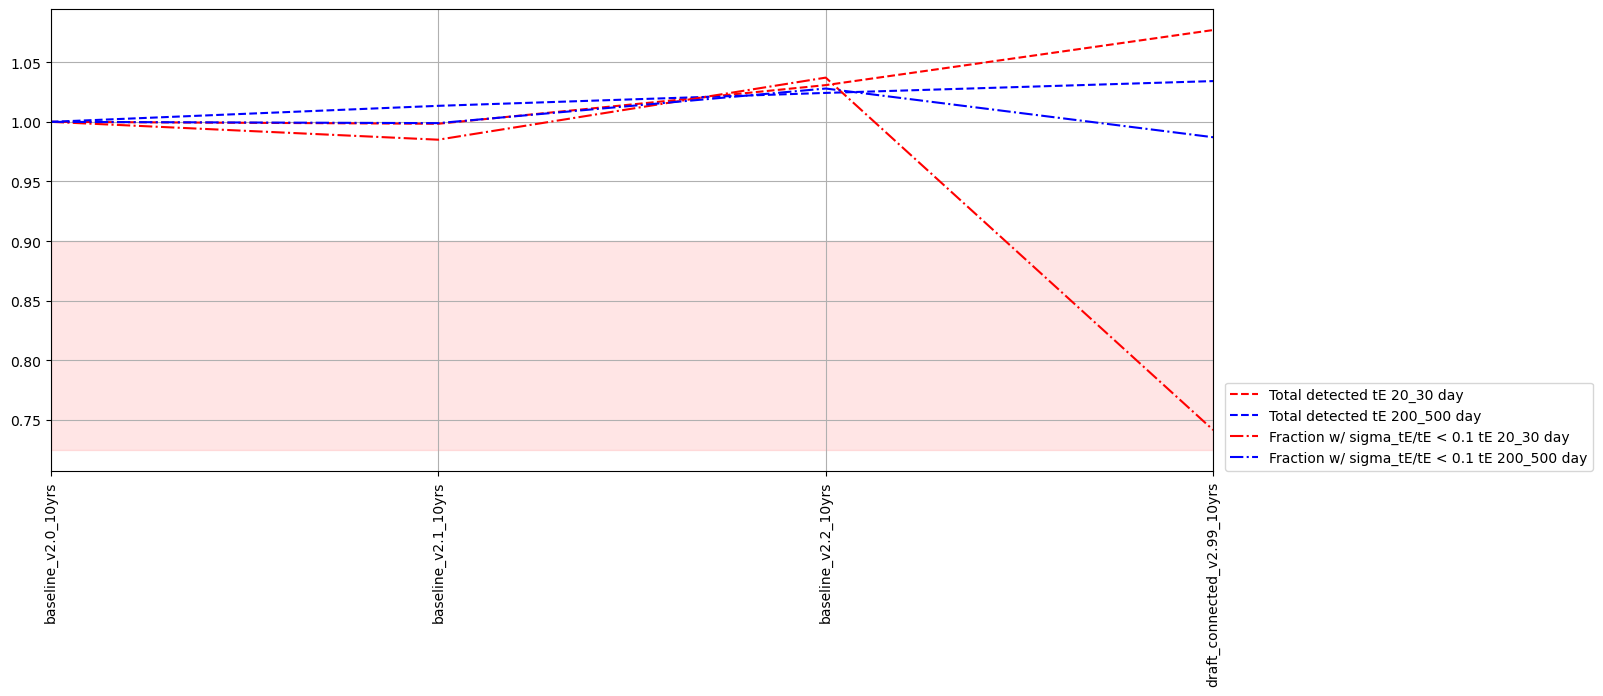

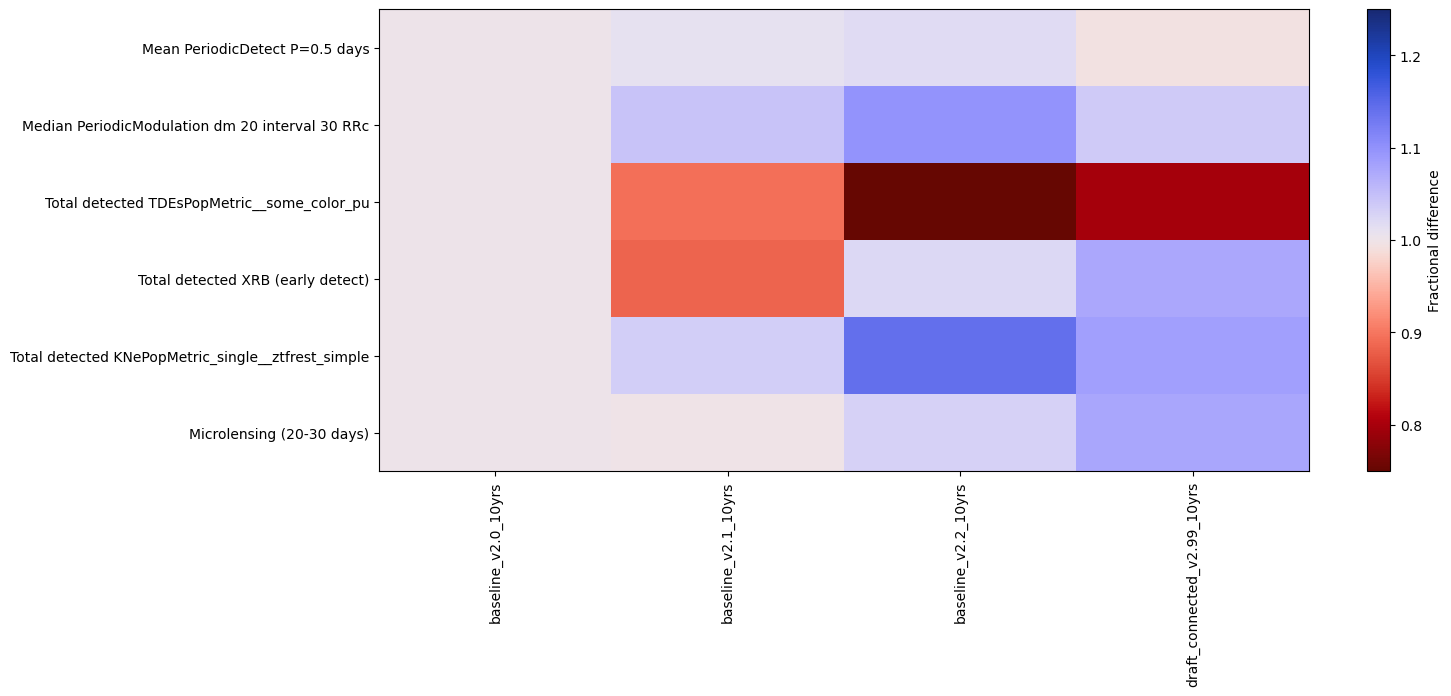

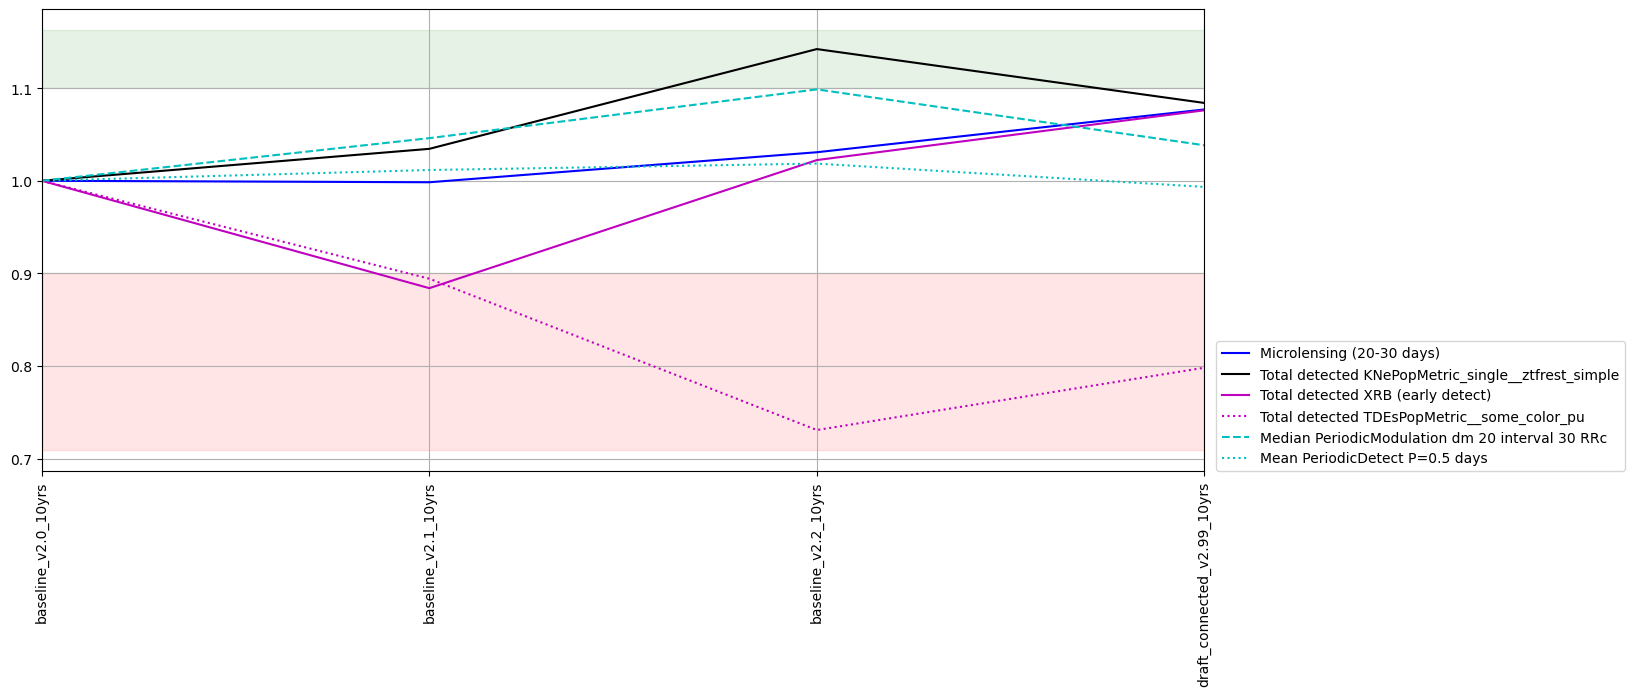

In [13]:
# TVS metrics
k_sets = [k for k in msets if k.startswith('TVS') and (k.endswith('short') or ('Tgaps' in k) or ('anomalies' in k)) ]

for k in k_sets:
    msub = metric_sets.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)


    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_sets.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_sets.loc[k],
                                  metric_label_map=metric_sets.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value', 
                                 shade_fraction=0.1)
    fig.set_figwidth(15)
    ylim = list(ax.get_ylim())
    ax.set_ylim(max(0.2, ylim[0]), min(2, ylim[1]))
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')


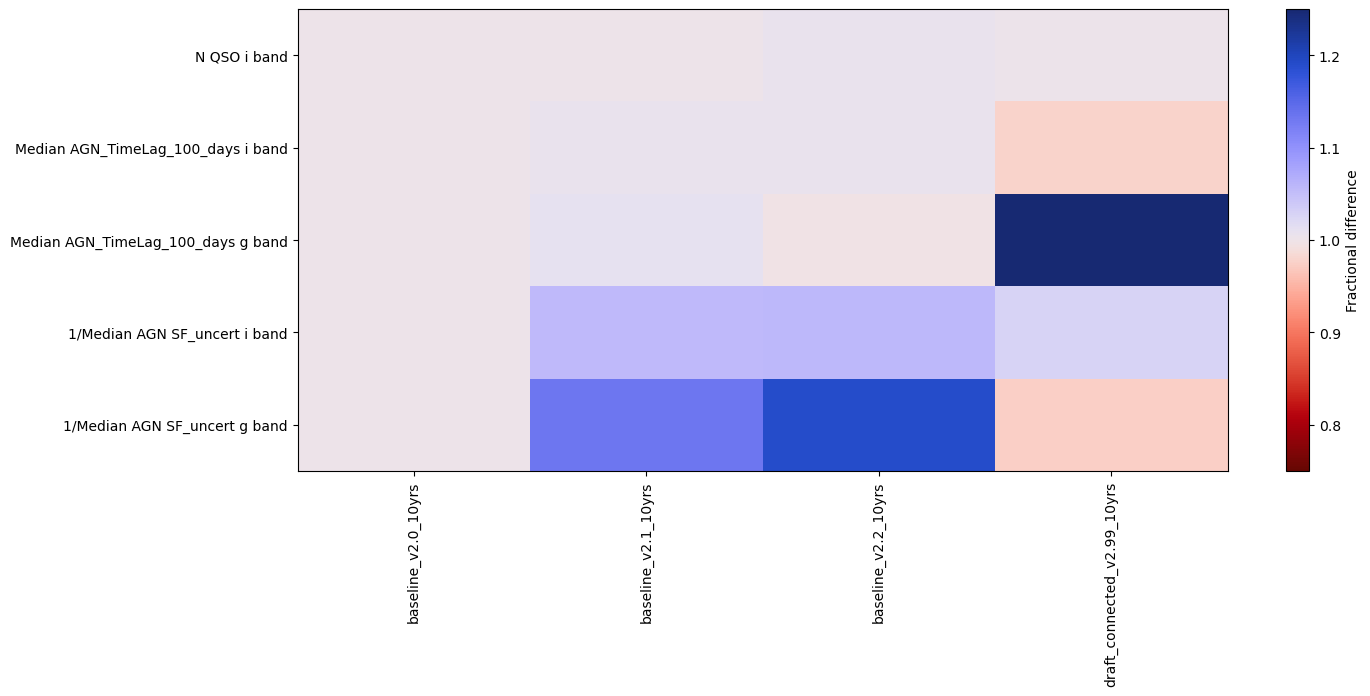

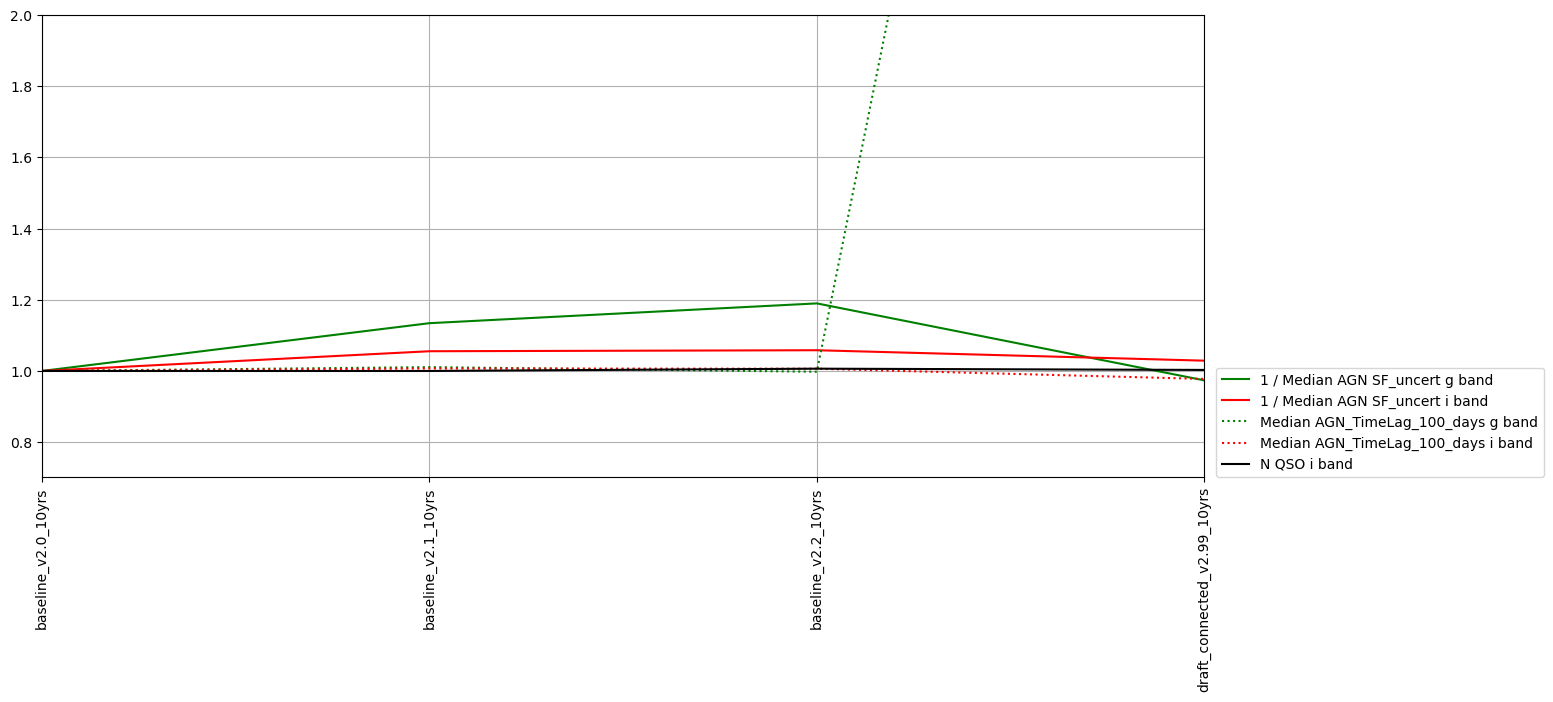

In [14]:
k = 'AGN short'
# AGN metrics
k_sets = ['AGN short']

msub = metric_sets.loc[k_sets].reset_index('metric set')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)


for k in k_sets:
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_sets.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_sets.loc[k],
                                  metric_label_map=metric_sets.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value',
                                 shade_fraction=0)
    ylims = ax.get_ylim()
    ax.set_ylim(max(0.2, ylims[0]), min(2, ylims[1]))
    fig.set_figwidth(15)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

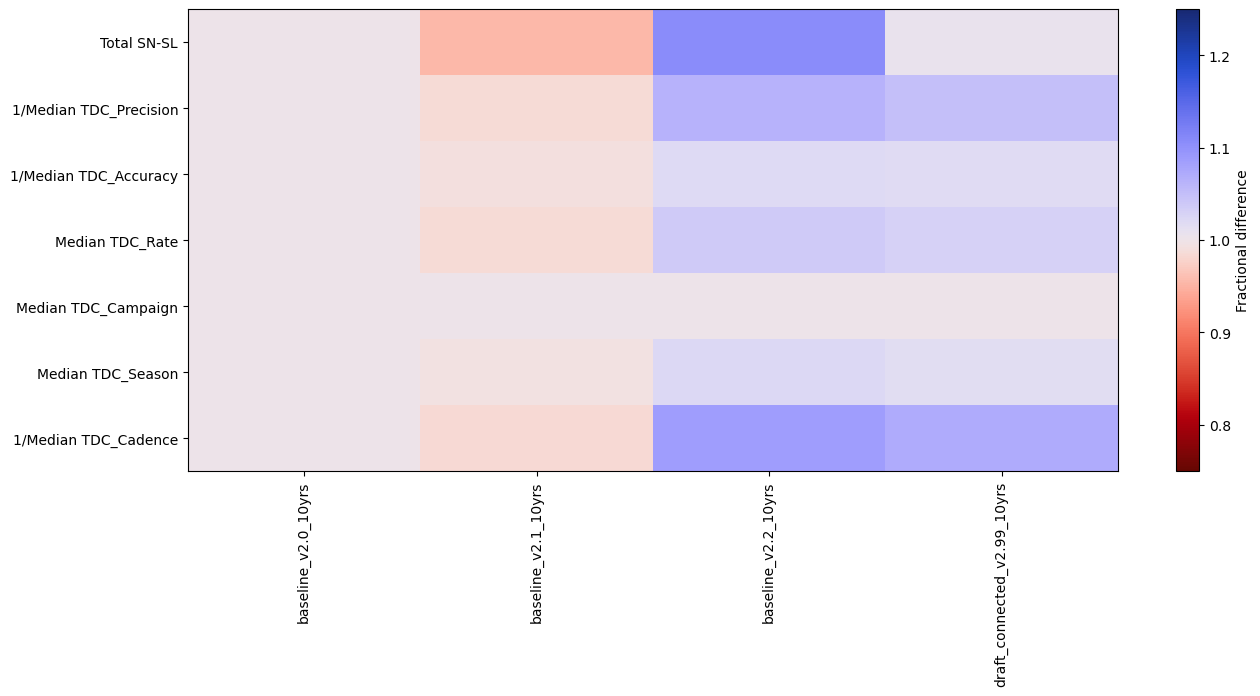

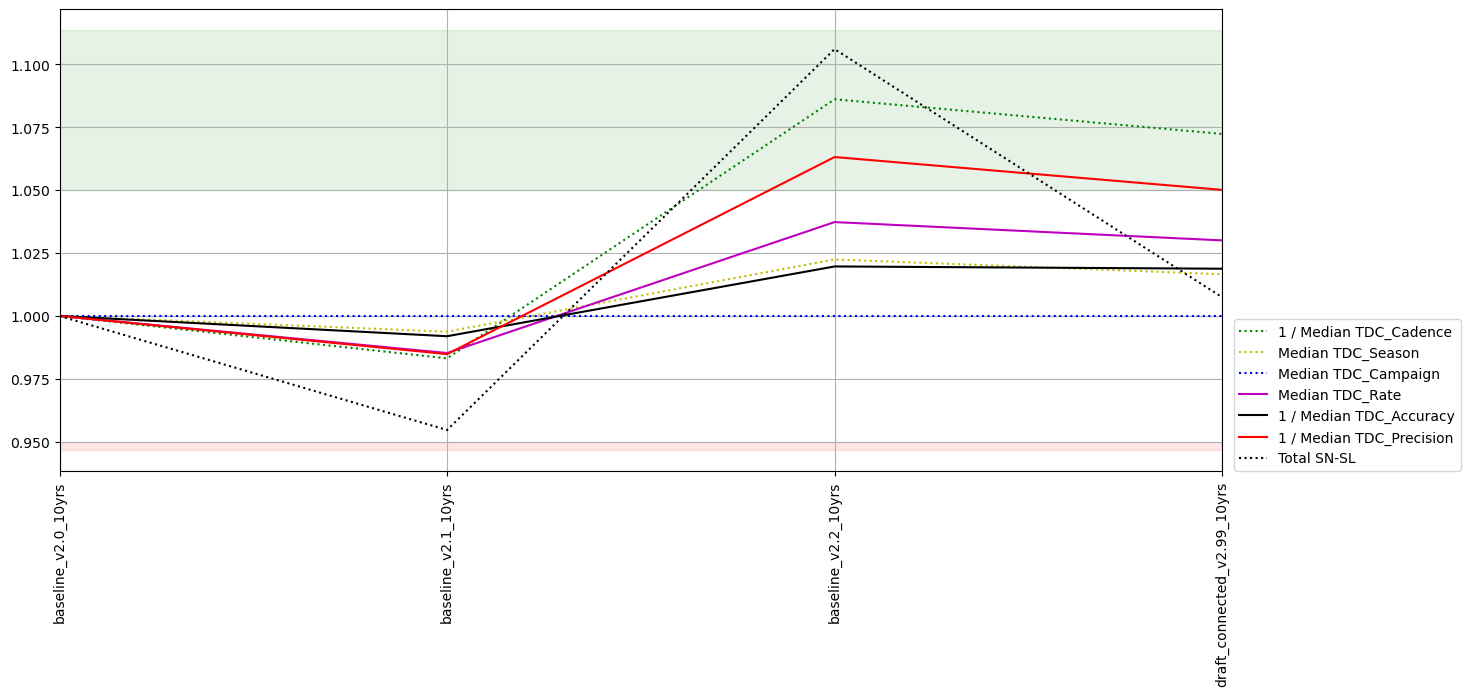

In [15]:
# StrongLensing metrics

k_sets = [k for k in msets if k.startswith('SL')]

msub = metric_sets.loc[k_sets].reset_index('metric set')
# Add the strong lensed supernova metric
msub = pd.concat([msub, 
                  metric_sets.loc['DESC WFD'].query('metric.str.contains("SNSL")', engine='python')])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)



fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']], 
                              baseline_run=baseline_run,
                              metric_set=msub,
                              metric_label_map=msub['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(15)
#ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')


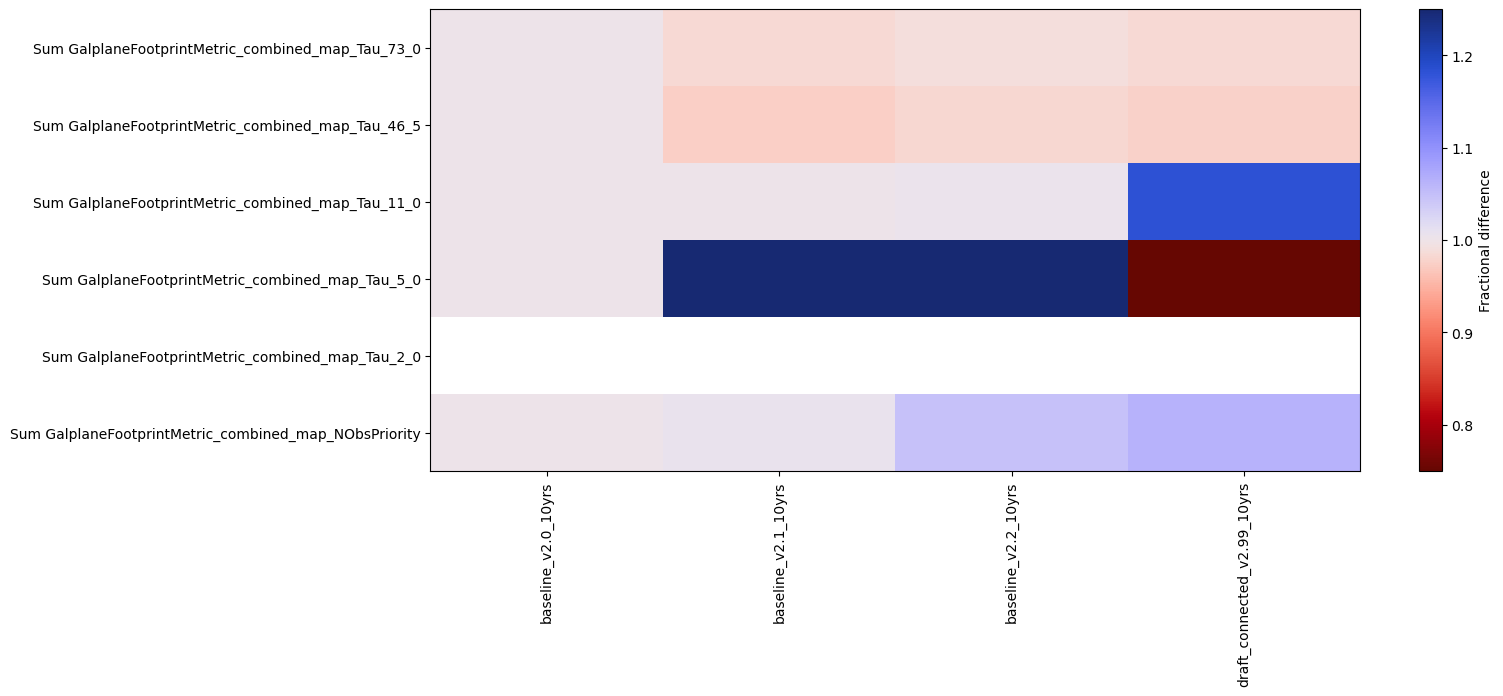

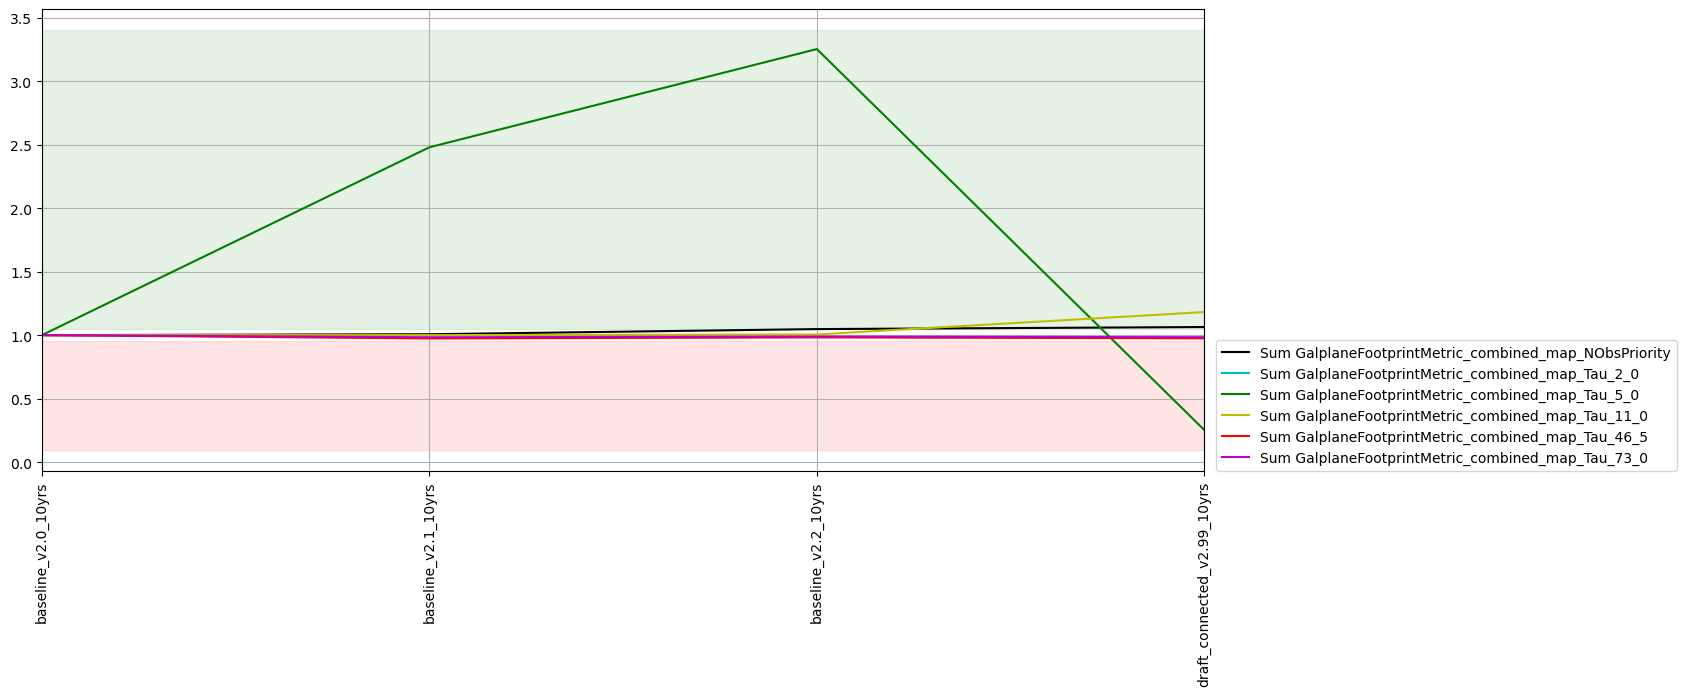

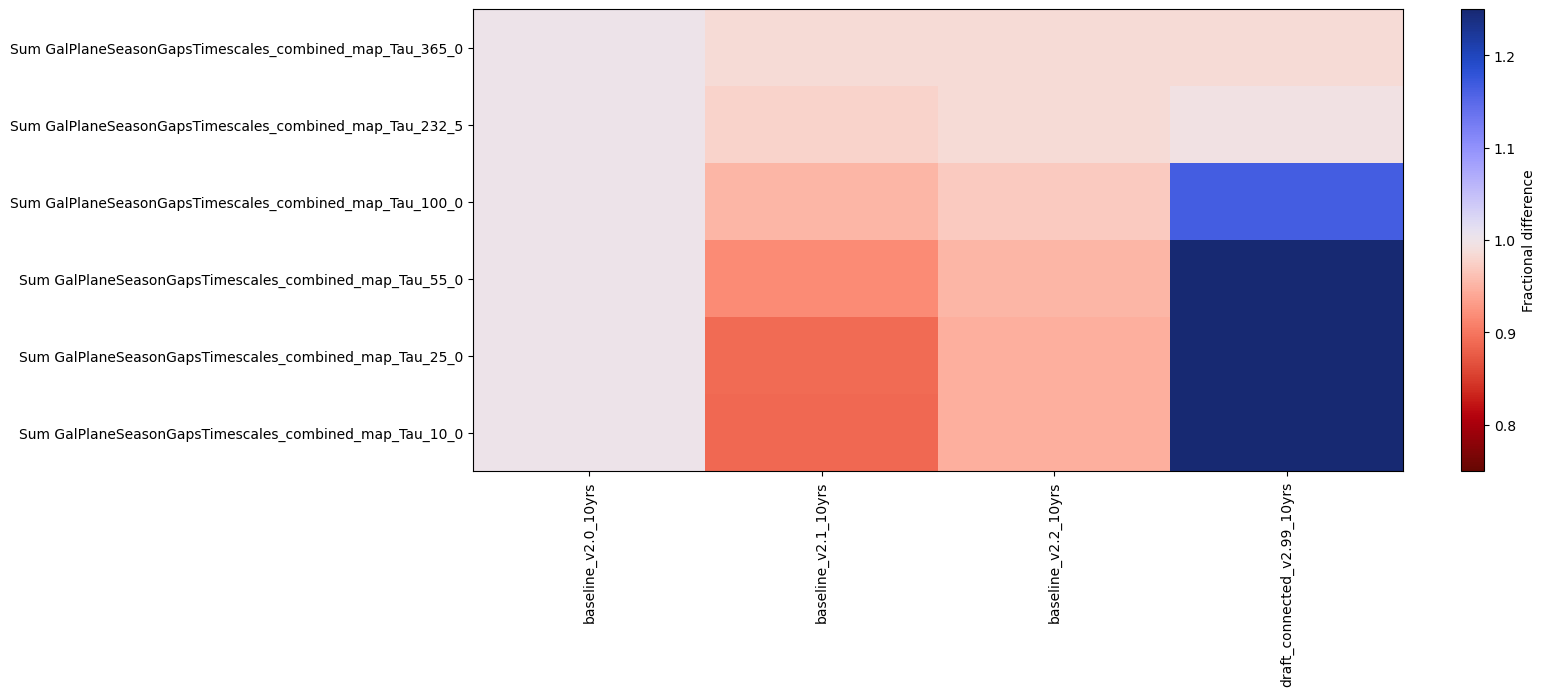

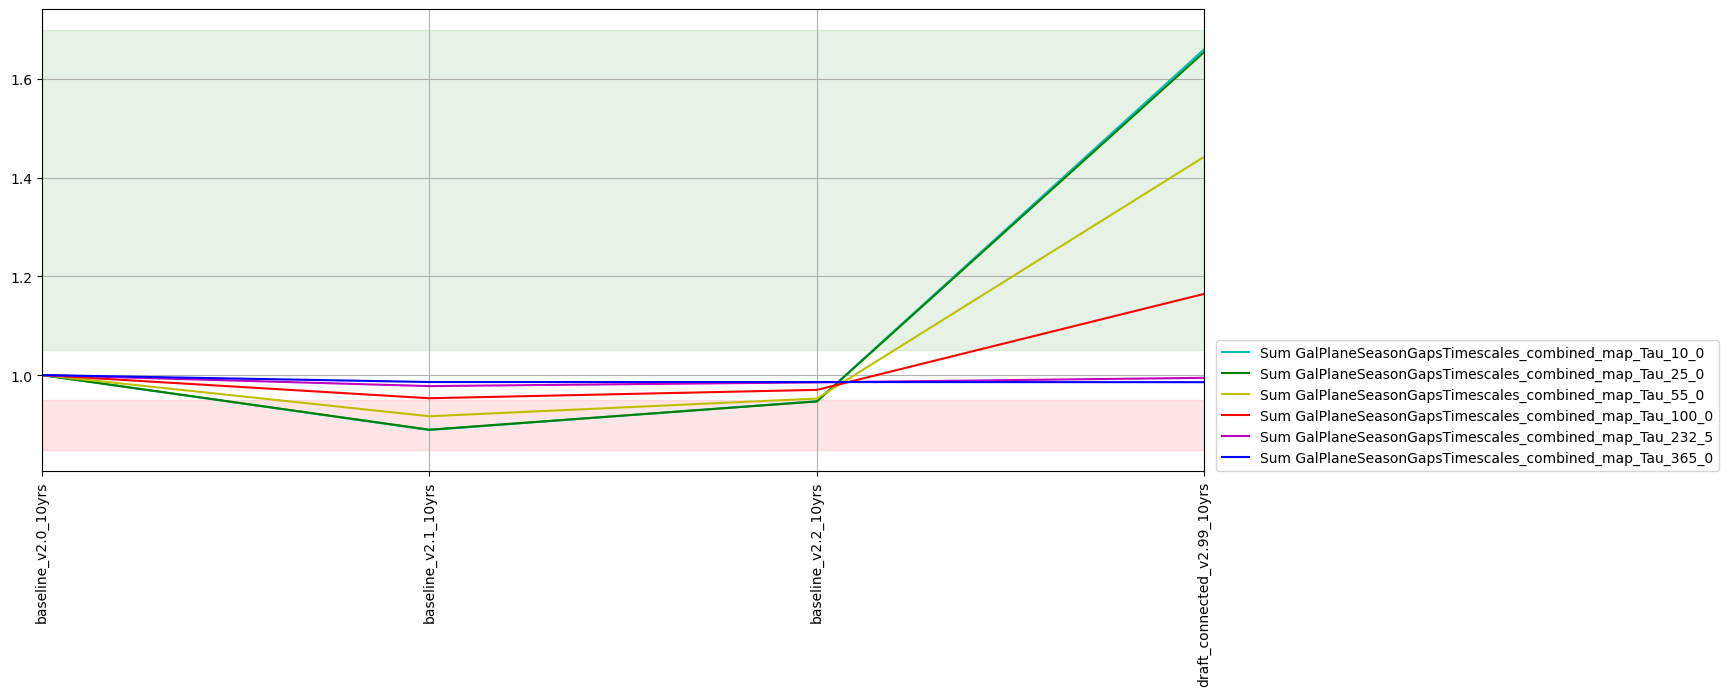

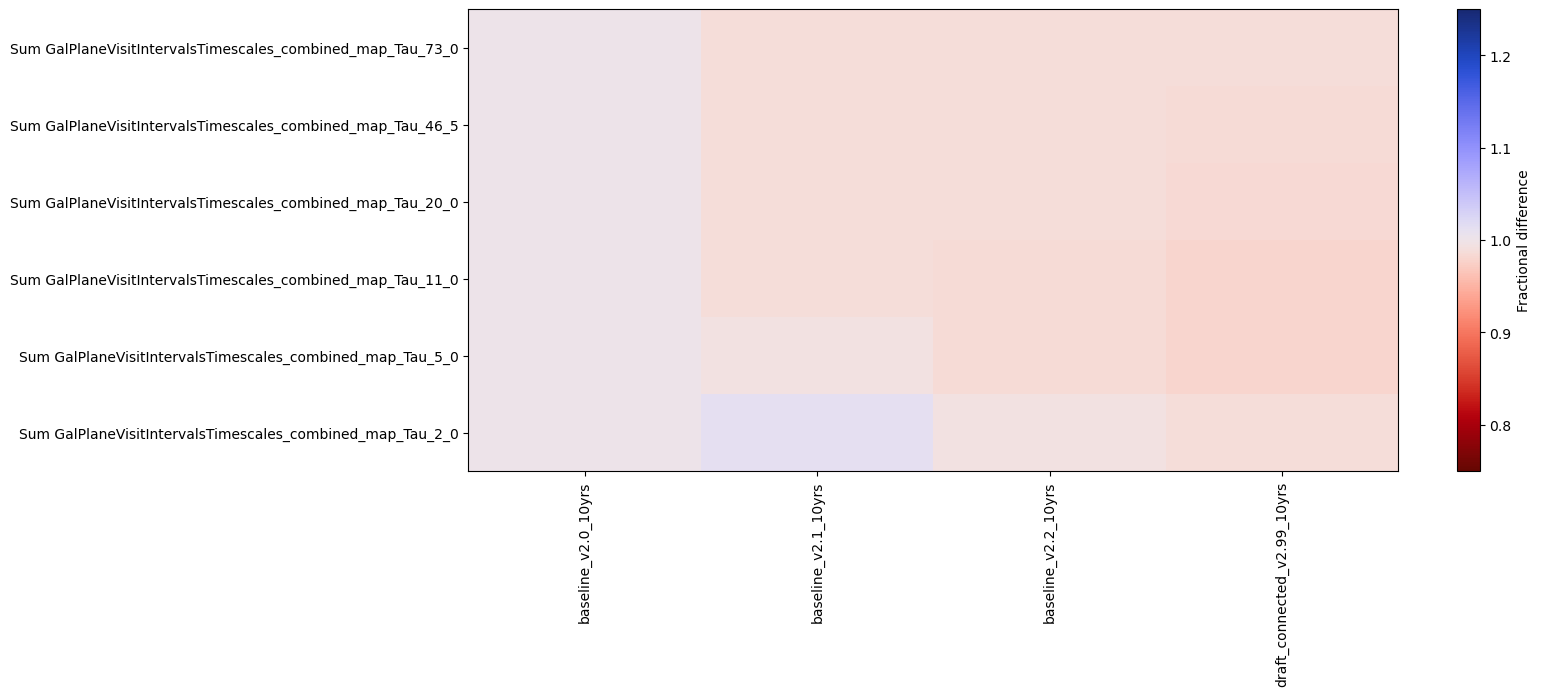

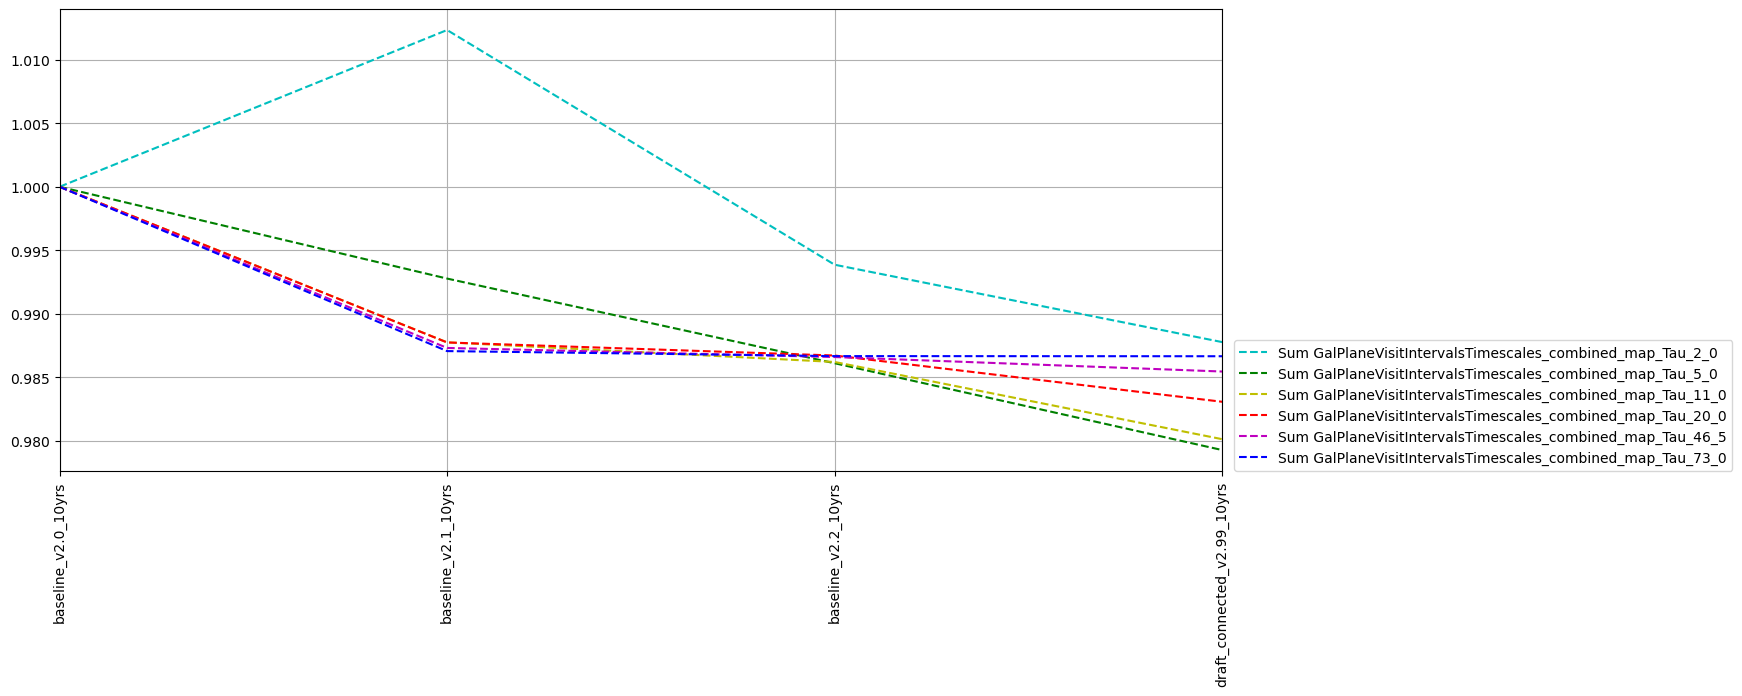

In [16]:
# GP footprint metrics
k_sets = [k for k in msets if k.startswith('GP') and 'filter' not in k]

for k in k_sets:
    msub = metric_sets.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)


    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_sets.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_sets.loc[k],
                                  metric_label_map=metric_sets.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')


Some of the trades above are due to DDF increases in time and adding the twilight NEO microsurvey, so let's check those benefits. 
(there are also trades due to changing the intranight cadence with triplets, but those should be reflected in the other metrics above, and likewise for the galactic plane footprint).

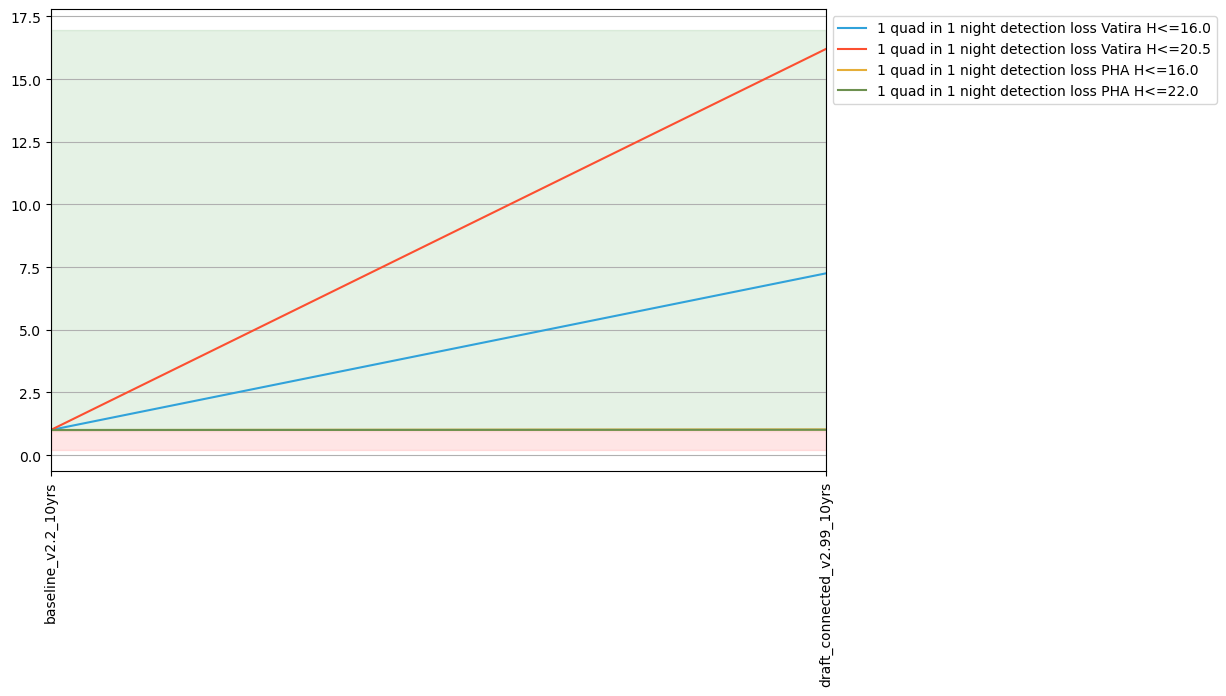

In [17]:
# microsurvey - vatira 
micro_discovery = [m for m in summaries if 'Vatira' in m and '1 quad in 1 night' in m ]
micro_discovery += [m for m in summaries if "PHA" in m and '1 quad in 1 night' in m and 'Nobj' not in m]

fig, ax = maf.plot_run_metric(summaries.loc[these_runs, micro_discovery].dropna(),
                            baseline_run='baseline_v2.2_10yrs',
                              linestyles=['-'],
                              markers=[''],
                             horizontal_quantity='run',
                             vertical_quantity='value')


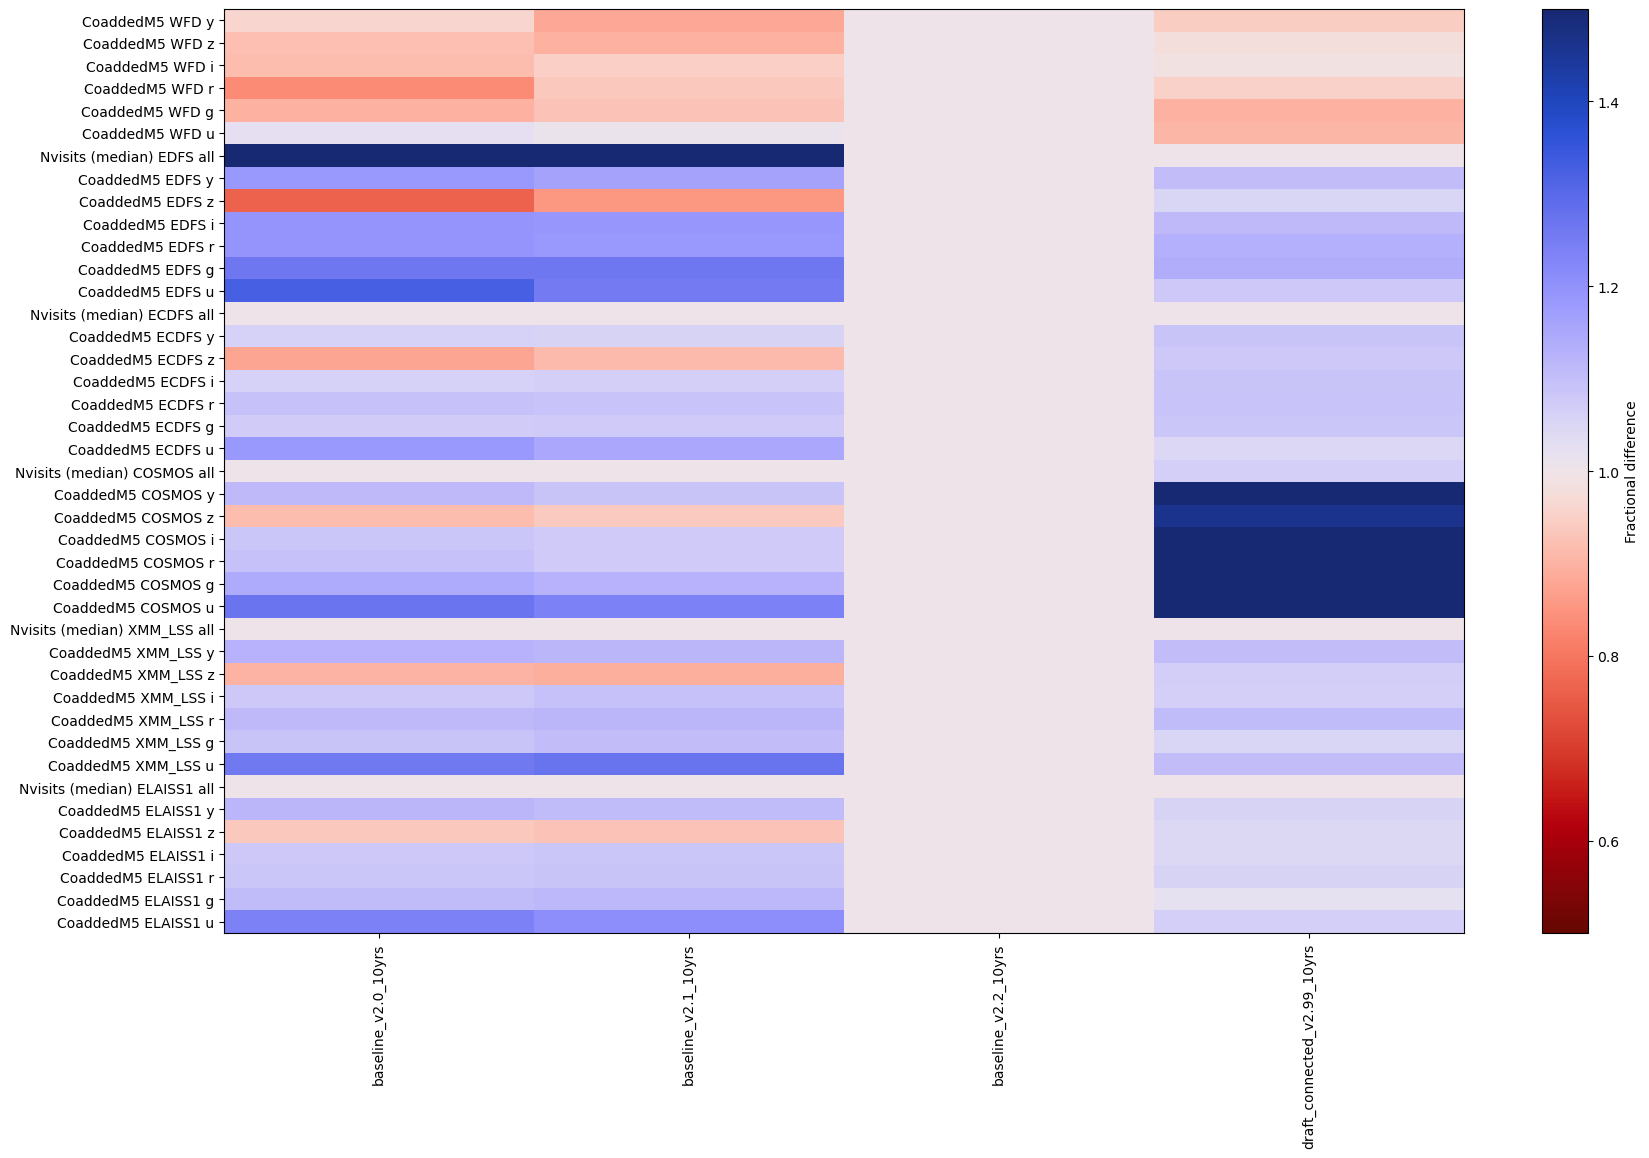

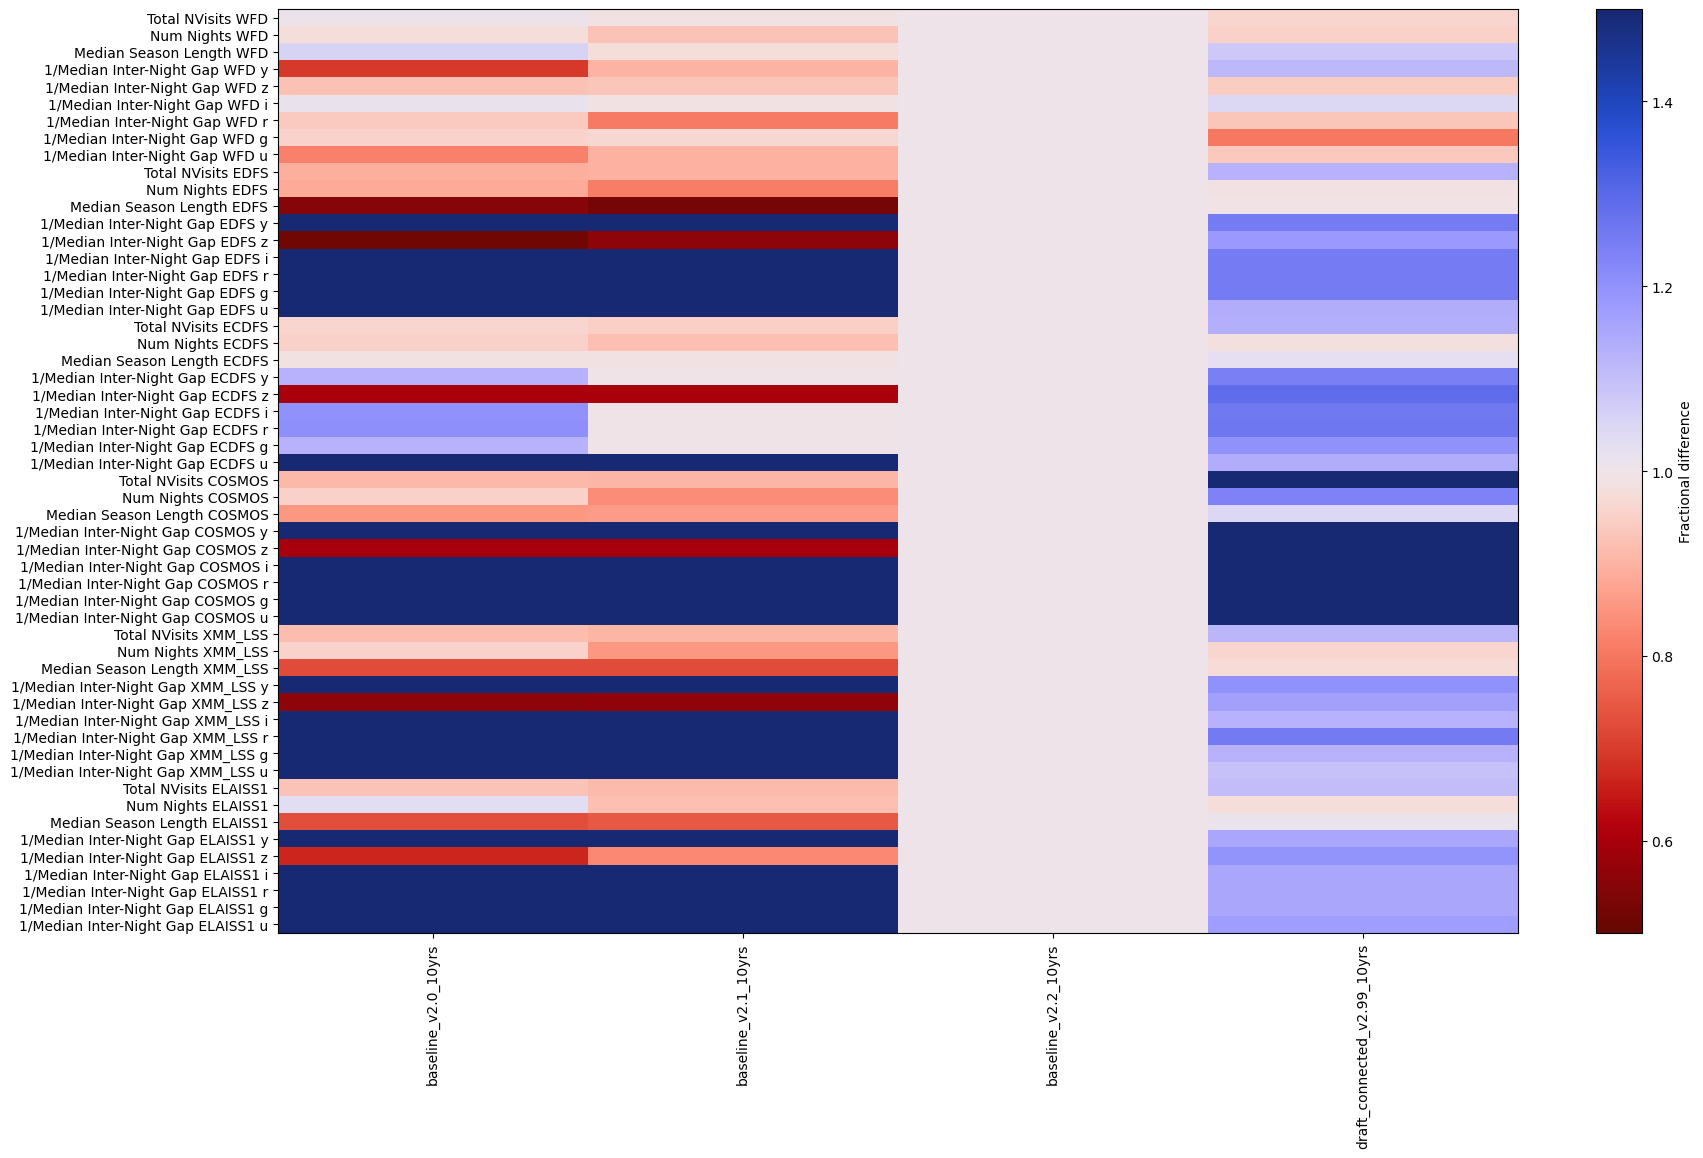

In [18]:
# DDF 
baseline = 'baseline_v2.2_10yrs'

for m in ['DDF Depths', 'DDF Cadence']:
    metrics = metric_sets.loc[m]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, metrics['metric']],
                                      baseline_run=baseline,
                                      metric_label_map=metrics['short_name'],
                                      metric_set=metrics, 
                                      color_range=1)
    fig.set_figwidth(20)
    fig.set_figheight(12)


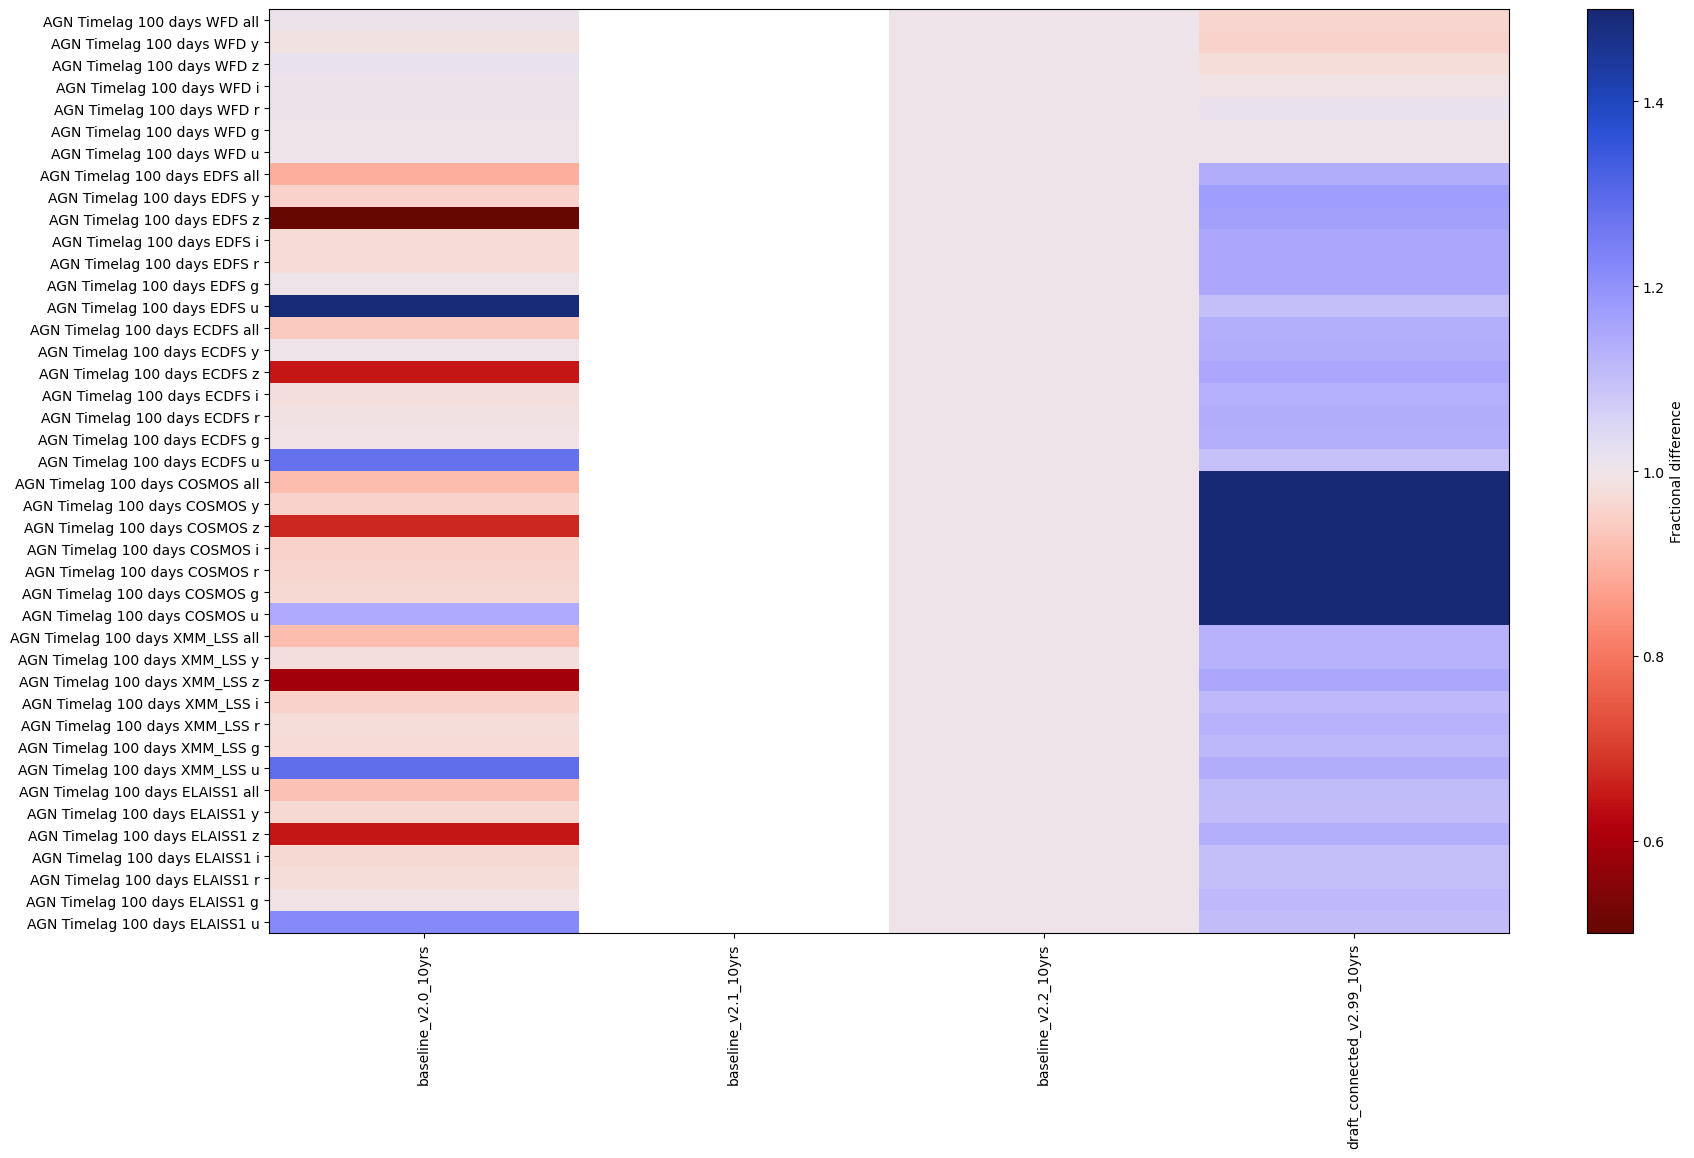

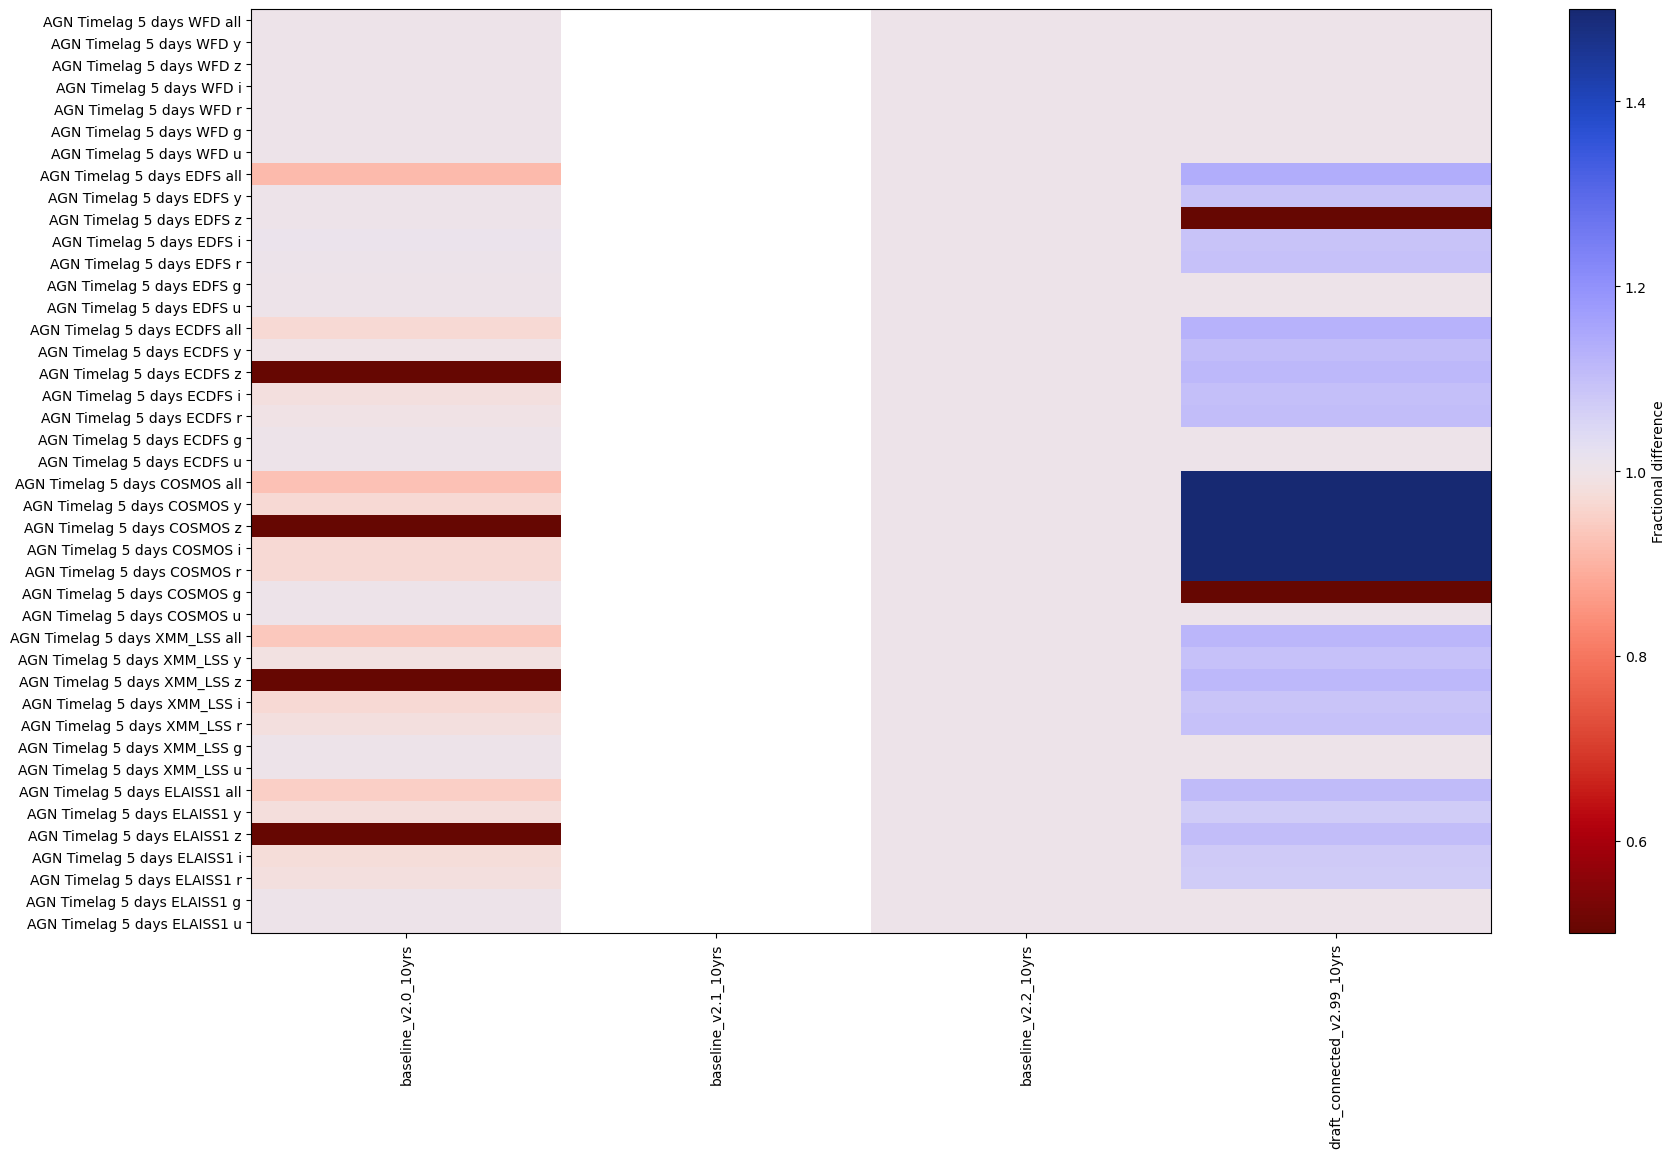

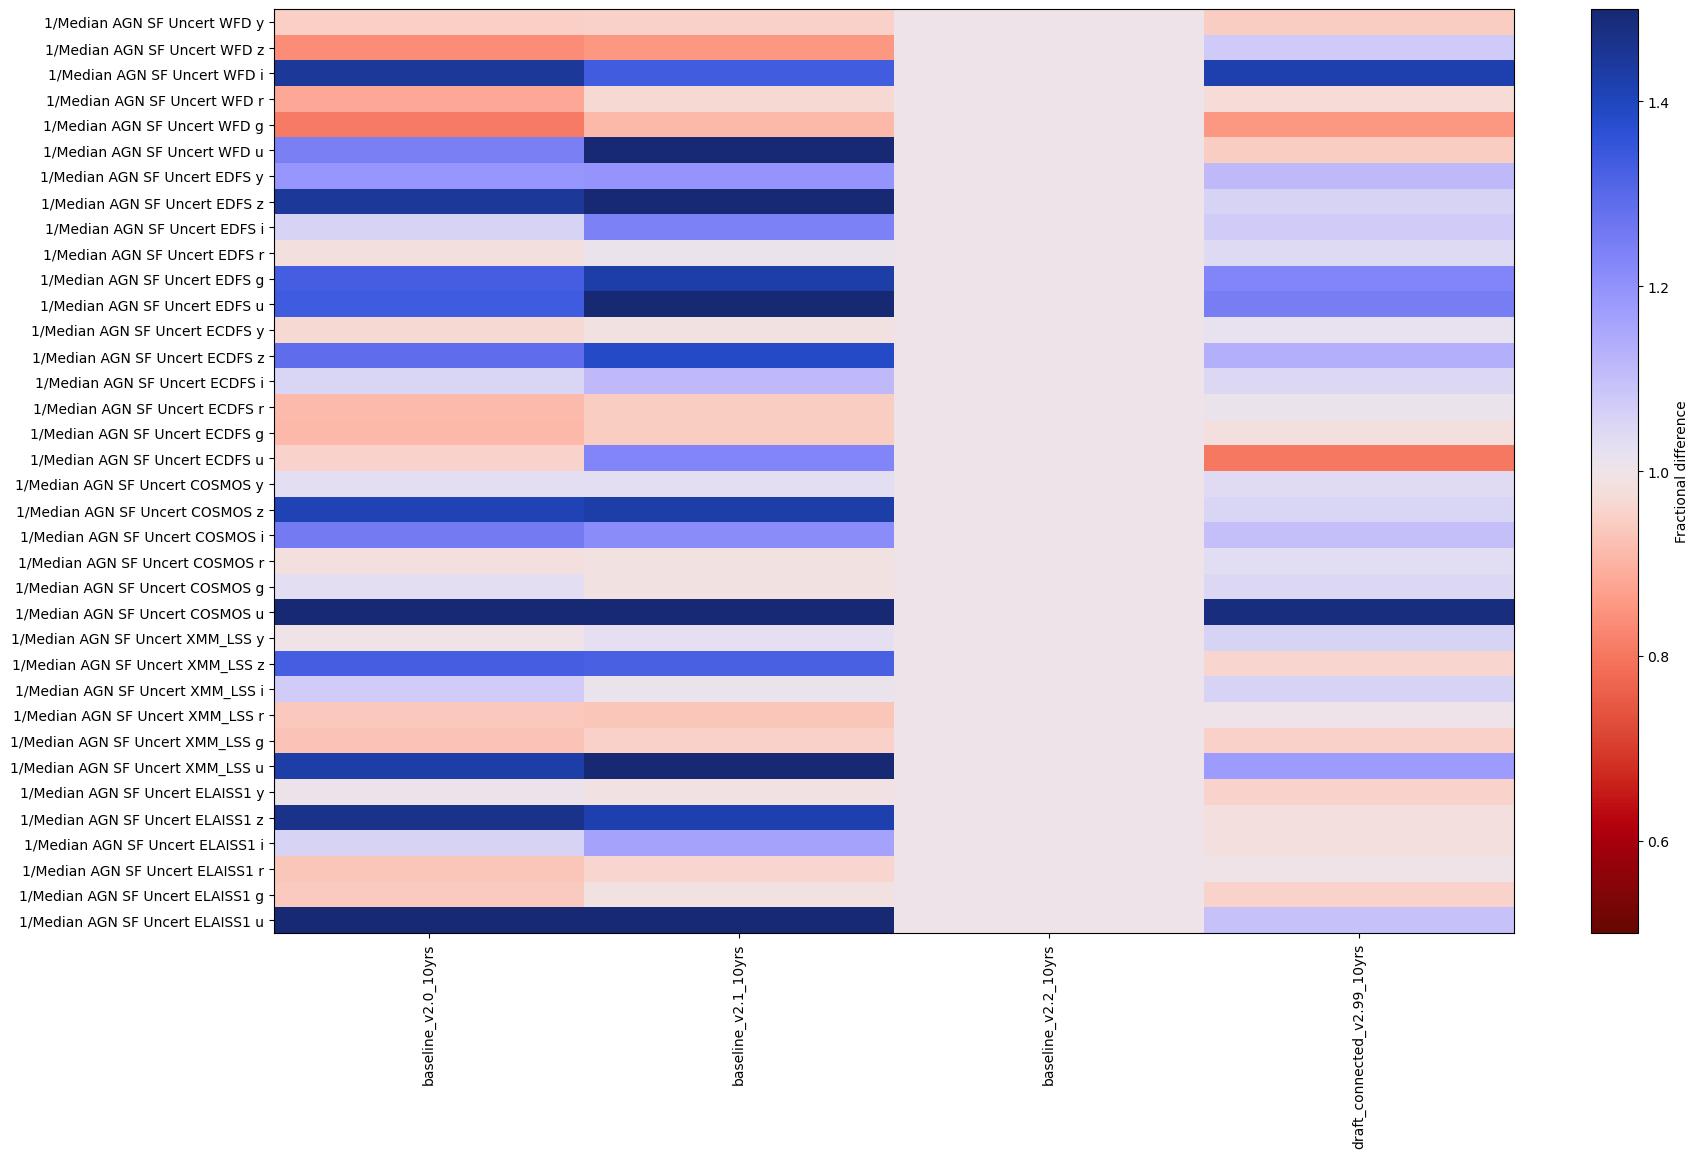

In [19]:
for m in ['AGN TimeLag 100 days DDF', 'AGN TimeLag 5 days DDF', 
          'AGN SF DDF']:
    metrics = metric_sets.loc[m]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, metrics['metric']],
                                      baseline_run=baseline,
                                      metric_label_map=metrics['short_name'],
                                      metric_set=metrics, 
                                      color_range=1)
    fig.set_figwidth(20)
    fig.set_figheight(12)

Sum SNNSNMetric DD:ELAISS1_nSN DD:ELAISS1 all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                                  81.438800                         
baseline_v2.2_10yrs                                                   3.753806                         
draft_connected_v2.99_10yrs                                          34.299888                         

                             Median SNNSNMetric DD:ELAISS1_zlim DD:ELAISS1 all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                                   0.593426                             
baseline_v2.2_10yrs                                                   0.600156                             
draft_connected_v2.99_10yrs                                           0.545990                             

                             Mean DD:ELAISS1 Median Inter-Night Gap r band UserPointsSlicer  \
baseline_v2.0_10yrs                                                   2.979590                
baseline_v2.2_10yrs                                                   8.976109                
draft_connected_v2.99_10yrs                                           7.769368                

                             Mean DD:ELAISS1 Median Season Length all bands UserPointsSlicer  \
baseline_v2.0_10yrs                                                 147.728578                 
baseline_v2.2_10yrs                                                 202.775236                 
draft_connected_v2.99_10yrs                                         204.645461                 

                             Sum SNNSNMetric DD:XMM_LSS_nSN DD:XMM_LSS all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                               1.000000e-30                         
baseline_v2.2_10yrs                                               1.000000e-30                         
draft_connected_v2.99_10yrs                                       6.329887e+01                         

                             Median SNNSNMetric DD:XMM_LSS_zlim DD:XMM_LSS all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                               1.000000e-30                             
baseline_v2.2_10yrs                                               1.000000e-30                             
draft_connected_v2.99_10yrs                                       5.446535e-01                             

                             Mean DD:XMM_LSS Median Inter-Night Gap r band UserPointsSlicer  \
baseline_v2.0_10yrs                                                   2.991340                
baseline_v2.2_10yrs                                                   8.971518                
draft_connected_v2.99_10yrs                                           7.152416                

                             Mean DD:XMM_LSS Median Season Length all bands UserPointsSlicer  \
baseline_v2.0_10yrs                                                 151.725567                 
baseline_v2.2_10yrs                                                 209.729819                 
draft_connected_v2.99_10yrs                                         203.760631                 

                             Sum SNNSNMetric DD:COSMOS_nSN DD:COSMOS all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                                  47.333916                       
baseline_v2.2_10yrs                                                  13.647867                       
draft_connected_v2.99_10yrs                                         497.970116                       

                             Median SNNSNMetric DD:COSMOS_zlim DD:COSMOS all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                                   0.596891                           
baseline_v2.2_10yrs                                                   0.514987                           
draft_connected_v2.99_10yrs                                           

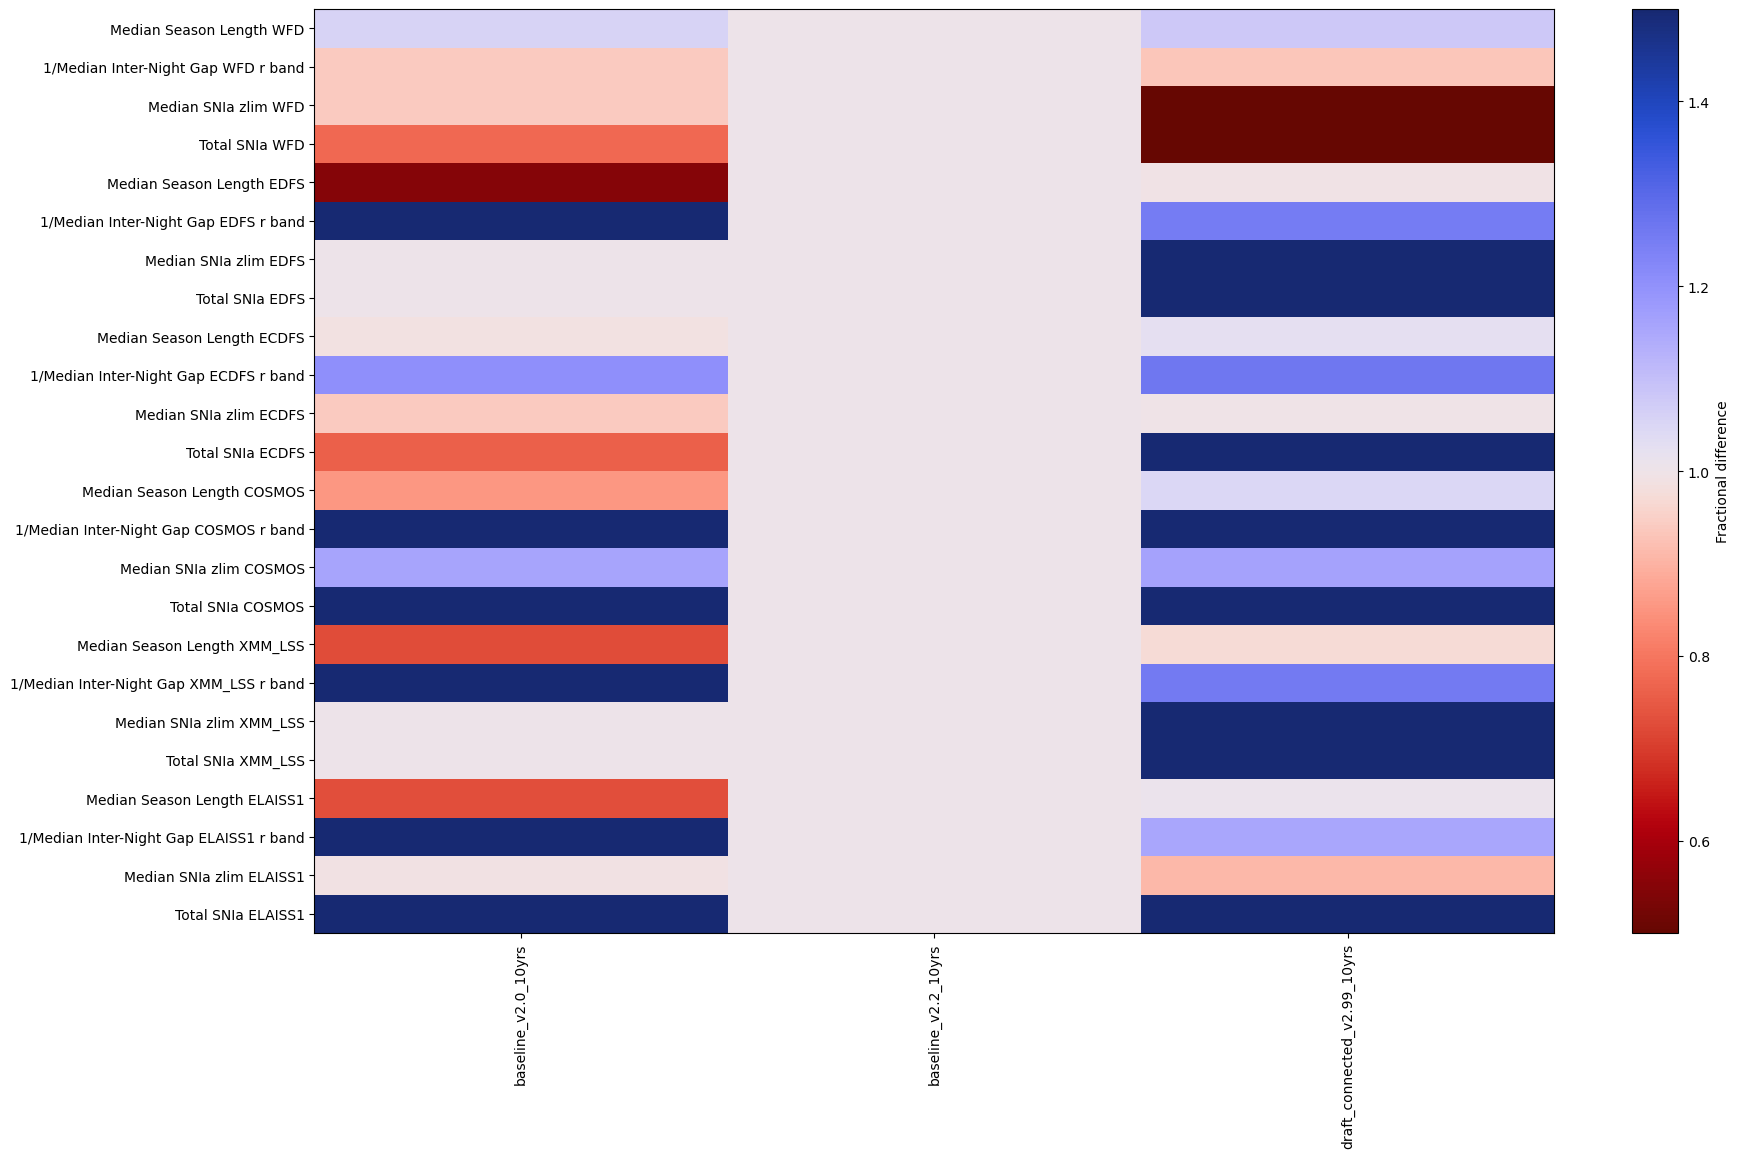

In [25]:
m = 'SNIa DDF'

metrics = metric_sets.loc[m]
# the SN summary values default to -1.6e30 for 'bad values' but this screws up normalization, so replace.
t = summaries.loc[these_runs, metrics['metric']].dropna()
t[t < 0] = 1e-30

metrics = metric_sets.loc[m]
fig, ax = maf.plot_run_metric_mesh(t,
                                  baseline_run=baseline,
                                  metric_label_map=metrics['short_name'],
                                  metric_set=metrics, 
                                  color_range=1)
fig.set_figwidth(20)
fig.set_figheight(12)
    
summaries.loc[these_runs, metric_sets.loc['SNIa DDF']['metric']]
t

Sum SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                                   0.015108         
baseline_v2.1_10yrs                                                   0.013812         
baseline_v2.2_10yrs                                                   0.013993         
draft_connected_v2.99_10yrs                                           0.013139         

                             Sum SNSLMetric DD:XMM_LSS all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                                   0.014272         
baseline_v2.1_10yrs                                                   0.013001         
baseline_v2.2_10yrs                                                   0.014243         
draft_connected_v2.99_10yrs                                           0.013669         

                             Sum SNSLMetric DD:COSMOS all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                                   0.014076        
baseline_v2.1_10yrs                                                   0.012324        
baseline_v2.2_10yrs                                                   0.014460        
draft_connected_v2.99_10yrs                                           0.018334        

                             Sum SNSLMetric DD:ECDFS all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                                   0.014287       
baseline_v2.1_10yrs                                                   0.013522       
baseline_v2.2_10yrs                                                   0.014000       
draft_connected_v2.99_10yrs                                           0.013325       

                             Sum SNSLMetric DD:EDFS all bands HealpixSubsetSlicer  \
baseline_v2.0_10yrs                                                   0.023664      
baseline_v2.1_10yrs                                                   0.024114      
baseline_v2.2_10yrs                                                   0.027733      
draft_connected_v2.99_10yrs                                           0.025336      

                             Sum SNSLMetric DD:WFD all bands HealpixSubsetSlicer  
baseline_v2.0_10yrs                                                   0.008779    
baseline_v2.1_10yrs                                                   0.009340    
baseline_v2.2_10yrs                                                   0.011644    
draft_connected_v2.99_10yrs                                           0.010677

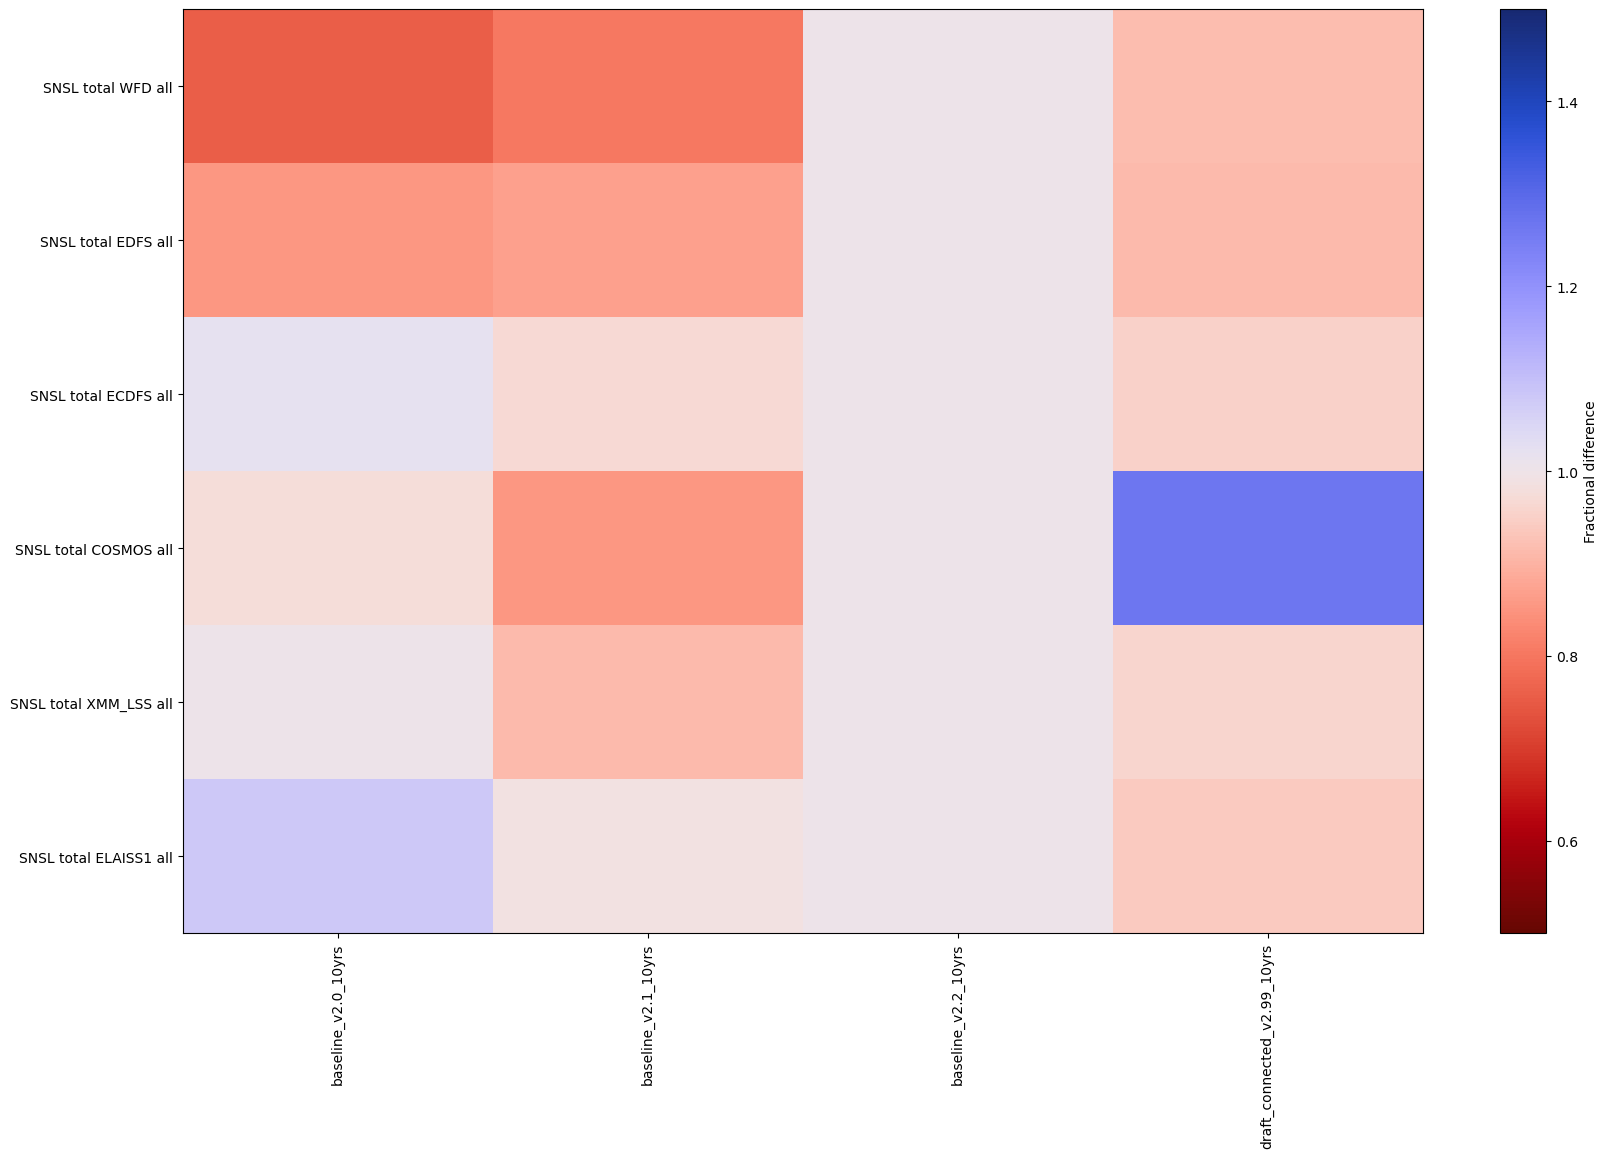

In [26]:
# The strong lensed SN are just very rare, so they show slight changes here but the actual values are likely
# equivalent 
for m in ['SNSL DDF']:
    metrics = metric_sets.loc[m]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, metrics['metric']],
                                      baseline_run=baseline,
                                      metric_label_map=metrics['short_name'],
                                      metric_set=metrics, 
                                      color_range=1)
    fig.set_figwidth(20)
    fig.set_figheight(12)
    
summaries.loc[these_runs, metric_sets.loc['SNSL DDF']['metric']]